# AIGC sentiment

python version:3.10.14

In [2]:
import pandas as pd
import ollama
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# if you need to set the max column width, remove the #
#pd.set_option('display.max_colwidth', None)

In [4]:
from scipy.stats import mannwhitneyu
def Mann_Whitney_U_test(srs1:pd.Series, srs2:pd.Series):
    '''进行曼-惠特尼U检验'''
    u_statistic, p_value = mannwhitneyu(srs1, srs2, alternative='less')
    if p_value < 0.05:
        print(f"U统计量: {u_statistic}, P值: {p_value}", end=', ')
        print('前者整体显著比后者小。')
        return
    
    u_statistic, p_value = mannwhitneyu(srs1, srs2, alternative='greater')
    if p_value < 0.05:
        print(f"U统计量: {u_statistic}, P值: {p_value}", end=', ')
        print('前者整体显著比后者大。')
        return
    
    u_statistic, p_value = mannwhitneyu(srs1, srs2, alternative='two-sided')
    print(f"U统计量: {u_statistic}, P值: {p_value}", end=', ')
    if p_value < 0.05:
        print('两组数据之间存在显著差异。')
    else:
        print('两组数据之间没有显著差异。')


from scipy.stats import ttest_ind
def t_test(srs1:pd.Series, srs2:pd.Series):
    '''进行T检验'''
    t_statistic, p_value = ttest_ind(srs1, srs2)
    print(f"T统计量: {t_statistic}, P值: {p_value}", end=', ')
    if p_value < 0.05:
        if t_statistic > 0:
            print('前者平均值显著比后者的大。')
        else:
            print('前者平均值显著比后者的小。')
    else:
        print('两组数据之间没有显著差异。')


# Reddit

In [3]:
Reddit = pd.read_csv("data/Reddit[topic=climatechange][model:gemma2+llama3+claude+70b]_[task:expand+response].csv")
Reddit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10900 entries, 0 to 10899
Data columns (total 47 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Unnamed: 0.1                           10900 non-null  int64  
 1   author                                 10900 non-null  object 
 2   Unnamed: 0                             10900 non-null  int64  
 3   created_utc                            10900 non-null  object 
 4   subreddit                              10900 non-null  object 
 5   body                                   10900 non-null  object 
 6   parent_id                              10897 non-null  object 
 7   subreddit_id                           10897 non-null  object 
 8   id                                     10897 non-null  object 
 9   lang                                   290 non-null    object 
 10  gemma2 expand                          10900 non-null  object 
 11  la

In [4]:
Reddit2 = pd.read_csv("data/response_texts[Reddit]_4o_complete.csv")
Reddit2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10901 entries, 0 to 10900
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   created_utc             10901 non-null  object 
 1   author                  10901 non-null  object 
 2   subreddit               10901 non-null  object 
 3   body                    10901 non-null  object 
 4   parent_id               10898 non-null  object 
 5   subreddit_id            10898 non-null  object 
 6   id                      10898 non-null  object 
 7   lang                    290 non-null    object 
 8   gemma2 expand           10901 non-null  object 
 9   label[orginal text]     10901 non-null  object 
 10  score[orginal text]     10901 non-null  float64
 11  label[gemma2 expand]    10901 non-null  object 
 12  score[gemma2 expand]    10901 non-null  float64
 13  orginal_label           10901 non-null  object 
 14  orginal_score           10901 non-null

In [5]:
dic = Reddit2.set_index('id')['4o_response_text'].to_dict()
Reddit['4o_response_text'] = Reddit['id'].map(dic)
Reddit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10900 entries, 0 to 10899
Data columns (total 48 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Unnamed: 0.1                           10900 non-null  int64  
 1   author                                 10900 non-null  object 
 2   Unnamed: 0                             10900 non-null  int64  
 3   created_utc                            10900 non-null  object 
 4   subreddit                              10900 non-null  object 
 5   body                                   10900 non-null  object 
 6   parent_id                              10897 non-null  object 
 7   subreddit_id                           10897 non-null  object 
 8   id                                     10897 non-null  object 
 9   lang                                   290 non-null    object 
 10  gemma2 expand                          10900 non-null  object 
 11  la

In [7]:
import pandas as pd

# 加载数据（假设是 CSV 文件）
reddit_df = Reddit
twitter_df = Twitter1

# 添加一列表示文本长度
reddit_df['body_length'] = reddit_df['body'].astype(str).apply(len)
twitter_df['text_length'] = twitter_df['text'].astype(str).apply(len)

print("Reddit body length stats:")
print(reddit_df['body_length'].describe())

print("\nTwitter text length stats:")
print(twitter_df['text_length'].describe())


Reddit body length stats:
count    10900.000000
mean       656.660183
std        900.540088
min         14.000000
25%        184.000000
50%        372.000000
75%        772.000000
max       9981.000000
Name: body_length, dtype: float64

Twitter text length stats:
count    12200.000000
mean       246.336148
std         32.137631
min        128.000000
25%        223.000000
50%        254.000000
75%        275.000000
max        307.000000
Name: text_length, dtype: float64


In [8]:
reddit_df['body_length'] = reddit_df['body'].astype(str).apply(len)
twitter_df['text_length'] = twitter_df['text'].astype(str).apply(len)

# 计算并打印平均文本长度
reddit_avg_length = reddit_df['body_length'].mean()
twitter_avg_length = twitter_df['text_length'].mean()

print(f"Reddit body 的平均长度: {reddit_avg_length:.2f}")
print(f"Twitter text 的平均长度: {twitter_avg_length:.2f}")


Reddit body 的平均长度: 656.66
Twitter text 的平均长度: 246.34


In [12]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 将所有文本合并为一个字符串
reddit_text = ' '.join(reddit_df['body'].dropna().astype(str))
twitter_text = ' '.join(twitter_df['text'].dropna().astype(str))

def generate_and_save_wordcloud(text, title, filename):
    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color='white',
        collocations=False
    ).generate(text)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=16)
    
    # 保存到本地
    plt.savefig(filename, bbox_inches='tight',dpi=300)
    plt.close()  # 关闭图像，避免多次显示

# 4. 生成并保存词云图
generate_and_save_wordcloud(reddit_text, 'Reddit Word Cloud', 'pic/reddit_wordcloud.png')
generate_and_save_wordcloud(twitter_text, 'Twitter Word Cloud', 'pic/twitter_wordcloud.png')

print("词云图已保存为 'reddit_wordcloud.png' 和 'twitter_wordcloud.png'")

词云图已保存为 'reddit_wordcloud.png' 和 'twitter_wordcloud.png'


## Preparation : text cleaning and sentiment

In [6]:
Reddit = Reddit[~Reddit['body'].isin(['[removed]', '[deleted]'])]

In [7]:
import pandas as pd
import re # 导入正则表达式模块

columns_to_clean = ['body', 'gemma2 expand', 'gemma2 response', 'llama3 response', 'llama3 expand', 'claude_expanded_text','claude_response_text', 'llama 3.3 70b response',
                    '4o_response_text']

# 合并后的正则表达式：匹配 @mentions 或 URL
# (@\S+) 匹配 @ 开头后跟非空白字符
# (https?://\S+) 匹配 http:// 或 https:// 开头的URL
# (www\.\S+) 匹配 www. 开头的URL (注意 . 需要转义)
pattern_to_remove = r'@\S+|https?://\S+|www\.\S+'

# 循环处理指定列
for col in columns_to_clean:
    if col in Reddit.columns: # 确保列存在
        # 移除匹配到的模式
        Reddit[col] = Reddit[col].str.replace(pattern_to_remove, '', regex=True)
        # 清理多余的空格 (移除首尾空格，并将中间多个空格压缩为一个)
        Reddit[col] = Reddit[col].str.split().str.join(' ')
    else:
        print(f"警告: 列 '{col}' 不在 DataFrame 中。")

print("\nDone")
#print(df2)


Done


In [ ]:
from transformers import pipeline
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

pipe = pipeline(
    "text-classification",
    model= "j-hartmann/emotion-english-distilroberta-base",#"cardiffnlp/xlm-v-base-tweet-sentiment-es",
    return_all_scores=False, 
    truncation=True,
    device=0 if torch.cuda.is_available() else -1  # 0:first GPU，-1:CPU
)

MAX_LENGTH = 512

def truncate_text(text, max_length=MAX_LENGTH):
    return text[:max_length]

def get_sentiment(text):
    truncated_text = truncate_text(text)
    result = pipe(truncated_text)
    sentiment_scores =  {item['label']: item['score'] for item in result[0]}
    
    return sentiment_scores

/home/wenlu/anaconda3/envs/agent/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/wenlu/anaconda3/envs/agent/lib/python3.10/site-packages/transformers/pipelines/text_classification.py:106: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


Error during conversion: ChunkedEncodingError(ProtocolError('Response ended prematurely'))


In [9]:
def get_sentiment(text):
    """
    获取文本的情感标签和分数
    """
    truncated_text = truncate_text(text)
    result = pipe(truncated_text)
    # Extract label and score
    label = result[0]['label']
    score = result[0]['score']
    return label, score

In [10]:
from tqdm import tqdm
tqdm.pandas(desc="Processing Text")

In [11]:
Reddit['4oresponse[senti_label][roberta]'], Reddit['4oresponse[senti_score][roberta]'] = zip(
	*Reddit['4o_response_text'].progress_apply(
		lambda x: (None, None) if pd.isna(x) else get_sentiment(x)
	)
)

Processing Text: 100%|██████████| 10900/10900 [00:42<00:00, 259.40it/s]


In [ ]:

Reddit['text_senti_label[roberta]'], Reddit['text_senti_score[roberta]'] = zip(*Reddit['body'].progress_apply(get_sentiment))

In [9]:
Reddit['gemma2expand[senti_label][roberta]'], Reddit['gemma2expand[senti_score][roberta]'] = zip(*Reddit['gemma2 expand'].progress_apply(get_sentiment))

Processing Text: 100%|██████████| 10900/10900 [00:41<00:00, 262.10it/s]


In [10]:
Reddit['gemma2response[senti_label][roberta]'], Reddit['gemma2response[senti_score][roberta]'] = zip(*Reddit['gemma2 response'].progress_apply(get_sentiment))

Processing Text: 100%|██████████| 10900/10900 [00:41<00:00, 263.23it/s]


In [11]:
Reddit['llama3expand[senti_label][roberta]'], Reddit['llama3expand[senti_score][roberta]'] = zip(*Reddit['llama3 expand'].progress_apply(get_sentiment))

Processing Text: 100%|██████████| 10900/10900 [00:41<00:00, 262.78it/s]


In [12]:
Reddit['llama3response[senti_label][roberta]'], Reddit['llama3response[senti_score][roberta]'] = zip(*Reddit['llama3 response'].progress_apply(get_sentiment))

Processing Text: 100%|██████████| 10900/10900 [00:41<00:00, 263.69it/s]


In [8]:
Reddit['3.3_70bresponse[senti_label][roberta]'], Reddit['3.3_70bresponse[senti_score][roberta]'] = zip(*Reddit['llama 3.3 70b response'].progress_apply(get_sentiment))

Processing Text: 100%|██████████| 10900/10900 [01:02<00:00, 173.82it/s]


In [9]:
Reddit['claude_response[senti_label][roberta]'], Reddit['claude_response[senti_score][roberta]'] = zip(
    *Reddit['claude_response_text'].progress_apply(
        lambda x: (None, None) if pd.isna(x) else get_sentiment(x)
    )
)

Processing Text: 100%|██████████| 10900/10900 [01:01<00:00, 176.06it/s]


In [10]:
Reddit['claude_expand[senti_label][roberta]'], Reddit['claude_expand[senti_score][roberta]'] = zip(
    *Reddit['claude_expanded_text'].progress_apply(
        lambda x: (None, None) if pd.isna(x) else get_sentiment(x)
    )
)

Processing Text: 100%|██████████| 10900/10900 [00:55<00:00, 195.68it/s]


In [12]:
Reddit.info()
Reddit.to_csv("data/Reddit[topic=climatechange][model:gemma2+llama3+claude+70b+4o]_[task:expand+response].csv")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10900 entries, 0 to 10899
Data columns (total 50 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Unnamed: 0.1                           10900 non-null  int64  
 1   author                                 10900 non-null  object 
 2   Unnamed: 0                             10900 non-null  int64  
 3   created_utc                            10900 non-null  object 
 4   subreddit                              10900 non-null  object 
 5   body                                   10900 non-null  object 
 6   parent_id                              10897 non-null  object 
 7   subreddit_id                           10897 non-null  object 
 8   id                                     10897 non-null  object 
 9   lang                                   290 non-null    object 
 10  gemma2 expand                          10900 non-null  object 
 11  la

In [3]:
Reddit2 = pd.read_csv("data/Reddit[topic=climatechange][model:llama3.3_70b_q2]_[task:expand].csv")

In [13]:
Reddit2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10900 entries, 0 to 10899
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   created_utc           10900 non-null  object
 1   author                10900 non-null  object
 2   subreddit             10900 non-null  object
 3   body                  10900 non-null  object
 4   parent_id             10900 non-null  object
 5   subreddit_id          10900 non-null  object
 6   id                    10900 non-null  object
 7   lang                  292 non-null    object
 8   Llama 3.3 q2 expand   10900 non-null  object
 9   Llama 3.3 70b expand  10900 non-null  object
dtypes: object(10)
memory usage: 851.7+ KB


In [15]:
Reddit2['3.3_70bexpand[senti_label][roberta]'], Reddit2['3.3_70bexpand[senti_score][roberta]'] = zip(*Reddit2['Llama 3.3 70b expand'].progress_apply(get_sentiment))

Processing Text: 100%|██████████| 10900/10900 [01:02<00:00, 174.68it/s]


In [21]:
Reddit2['text_senti_label[roberta]'], Reddit2['text_senti_score[roberta]'] = zip(*Reddit2['body'].progress_apply(get_sentiment))

Processing Text: 100%|██████████| 10900/10900 [01:01<00:00, 177.43it/s]


In [22]:
Reddit2.to_csv("data/Reddit[topic=climatechange][model:llama3.3_70b_q2]_[task:expand].csv",index = False)

In [18]:
Reddit2['3.3_70bexpand[senti_label][roberta]'].value_counts()

3.3_70bexpand[senti_label][roberta]
neutral     4907
disgust     1692
fear        1669
anger        963
surprise     857
sadness      439
joy          373
Name: count, dtype: int64

## 1. 2models

### 1.1 *Heatmap plot*

In [3]:
Reddit = pd.read_csv("data/Reddit[topic=climatechange][model:gemma2+llama3+claude+70b+4o]_[task:expand+response].csv")

/tmp/ipykernel_3139999/497099800.py:69: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


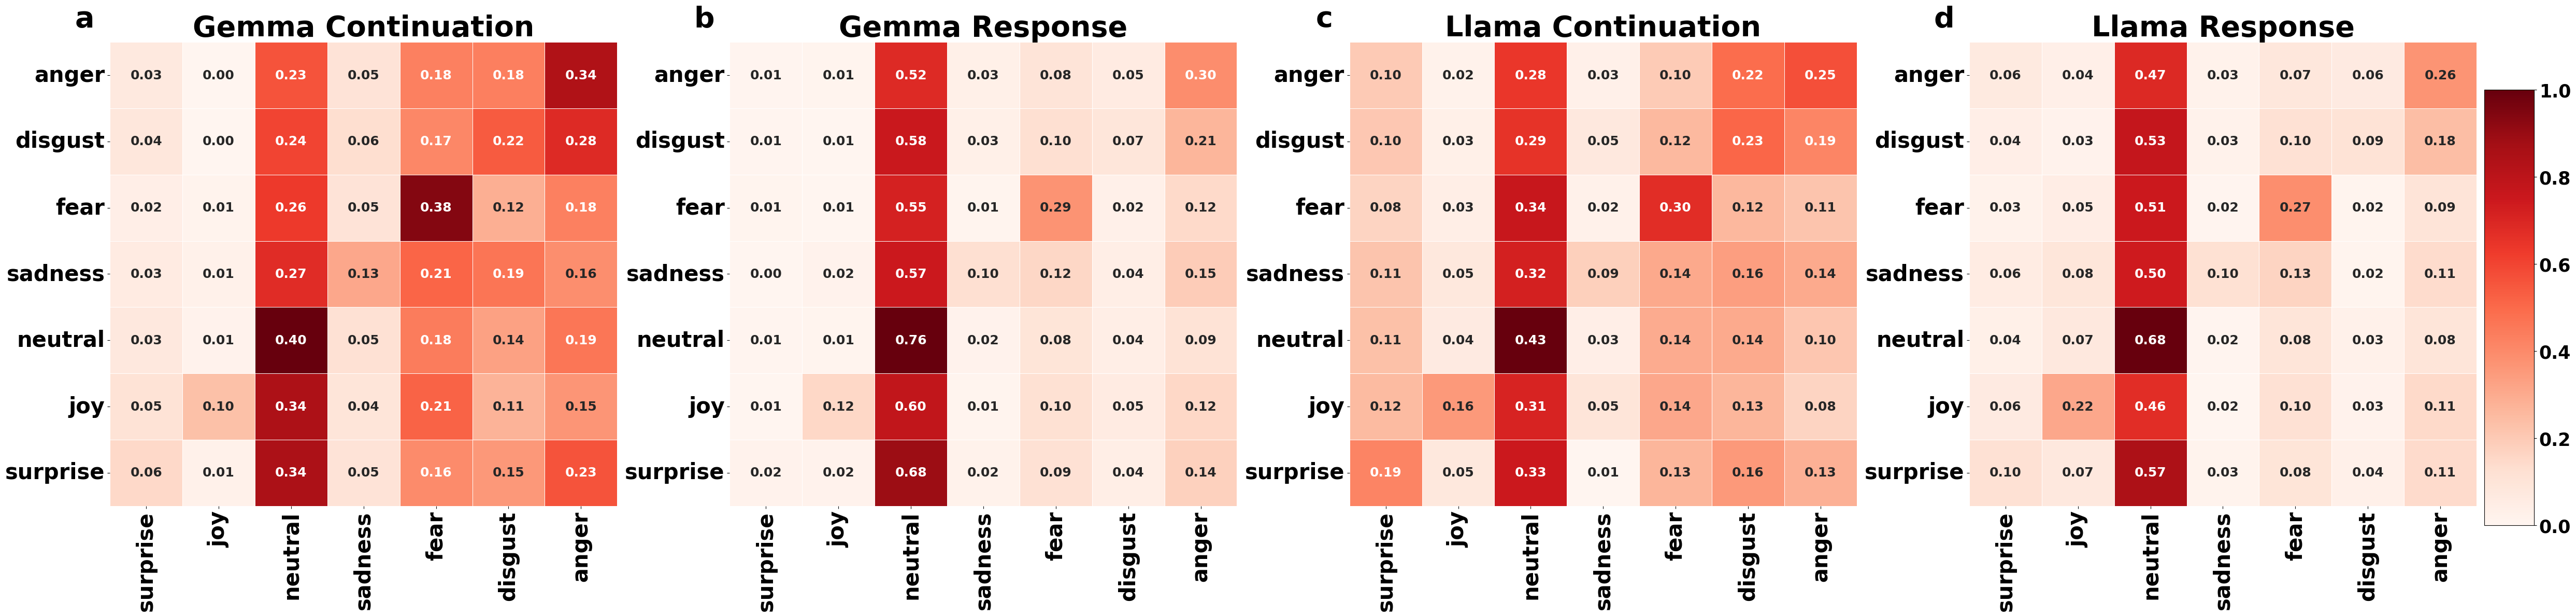

In [ ]:
import numpy as np
# subplots
columns = ["gemma2expand[senti_label][roberta]", "gemma2response[senti_label][roberta]", "llama3expand[senti_label][roberta]", "llama3response[senti_label][roberta]", 
           "claude_expand[senti_label][roberta]","claude_response[senti_label][roberta]", "3.3_70bresponse[senti_label][roberta]"]
titles = ["Gemma Continuation", "Gemma Response", "Llama 3.2 Continuation", "Llama 3.2 Response", "Claude Continuation", "Claude Response", "Llama 3.3 Response"]
vmin = 0 
vmax = 1
sub_labels = ['a', 'b', 'c', 'd','e', 'f','g'] 

df = Reddit
fig, axes = plt.subplots(1, 4, figsize=(48, 12))
axes = axes.flatten()

for i, col in enumerate(columns):
    transition_matrix = pd.crosstab(
        df["text_senti_label[roberta]"], 
        df[col],
        rownames=["Original"],
        colnames=[col]
    )
    transition_matrix_normalized = transition_matrix.div(transition_matrix.sum(axis=1), axis=0)
    emotions_order = ['anger', 'disgust', 'fear', 'sadness', 'neutral', 'joy', 'surprise']
    #actual_emotions = transition_matrix_normalized.index.intersection(emotions_order)
    transition_matrix_normalized_2 = transition_matrix_normalized.reindex(index=emotions_order)

    change_column = ['surprise', 'joy','neutral','sadness','fear','disgust','anger']
    #change_column = transition_matrix_normalized.columns.intersection(change_column)
    transition_matrix_normalized_2 = transition_matrix_normalized_2.reindex(columns = change_column)
 
    sns.heatmap(
        transition_matrix_normalized_2, 
        annot=True, 
        fmt=".2f", 
        cmap="Reds", 
        cbar=False,  
        ax=axes[i], 
        linewidths=0.5,
        annot_kws={"size": 18, "weight": "bold"}
    )
    
    axes[i].set_xticklabels(axes[i].get_xticklabels(), fontsize=30,fontweight = 'bold', rotation = 90)  
    axes[i].set_yticklabels(axes[i].get_yticklabels(), fontsize=30,fontweight = 'bold', rotation = 0)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")
    # title
    axes[i].set_title(f"{titles[i]}",fontweight = 'bold', fontsize=40)

    
    axes[i].annotate(
        sub_labels[i], 
        xy=(-0.05, 1.05), 
        xycoords='axes fraction', 
        fontsize=40, 
        fontweight='bold', 
        ha='center', 
        va='center'
    )
    

cbar_ax = fig.add_axes([1, 0.15, 0.02, 0.7])  # colorbar position（left, down, width, height）
norm = plt.Normalize(vmin=vmin, vmax=vmax)
sm = plt.cm.ScalarMappable(cmap="Reds", norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, cax=cbar_ax)
cbar.ax.tick_params(labelsize=25)
for label in cbar.ax.get_yticklabels():
    label.set_fontweight('bold')
#cbar.set_label("Degree of Intensity") 

plt.tight_layout()
plt.savefig("pic/heatmap[Reddit][2models]_normalized[roberta].png", dpi = 300, bbox_inches='tight')
plt.savefig("pic/heatmap[Reddit][2models]_normalized[roberta].pdf", dpi = 300, bbox_inches='tight' )
plt.show()

/tmp/ipykernel_244153/2748471724.py:114: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


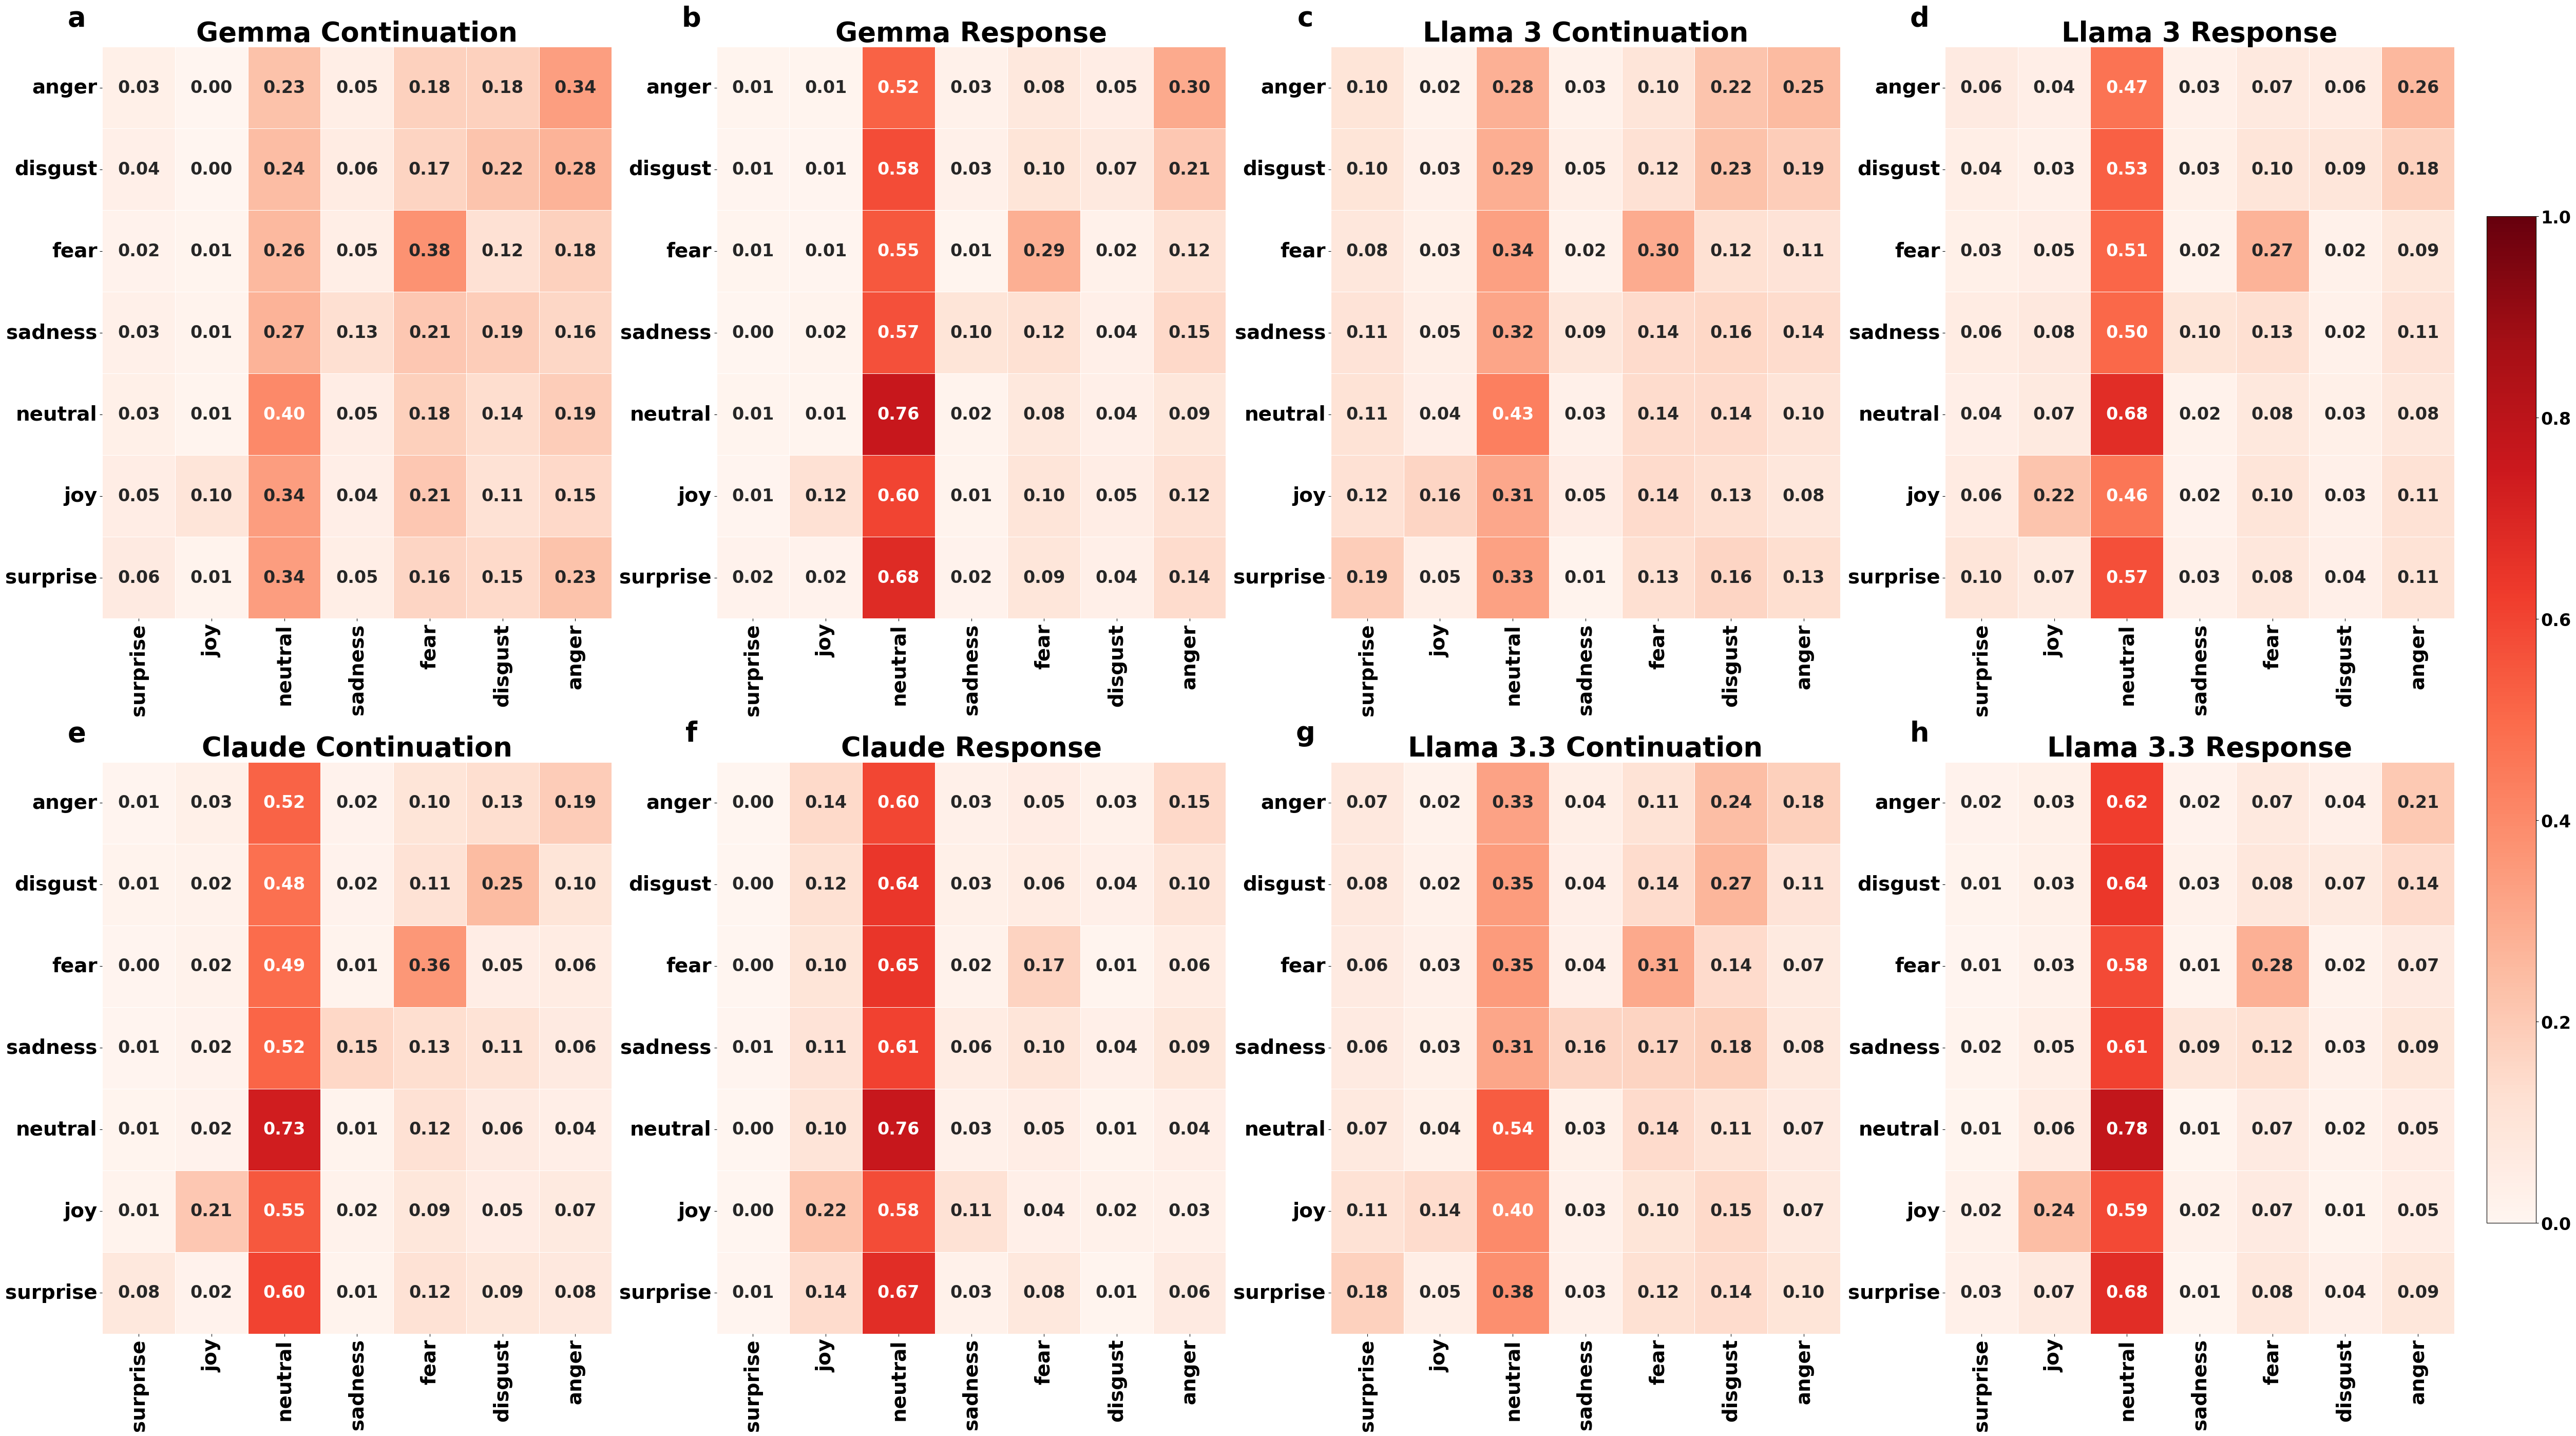

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ---- 全局设置 ----
columns = [
    "gemma2expand[senti_label][roberta]",
    "gemma2response[senti_label][roberta]",
    "llama3expand[senti_label][roberta]",
    "llama3response[senti_label][roberta]",
    "claude_expand[senti_label][roberta]",
    "claude_response[senti_label][roberta]",
    "3.3_70bexpand[senti_label][roberta]",  # Reddit2 中的
    "3.3_70bresponse[senti_label][roberta]"
    
]

titles = [
    "Gemma Continuation", "Gemma Response",
    "Llama 3 Continuation", "Llama 3 Response",
    "Claude Continuation", "Claude Response",
    "Llama 3.3 Continuation", "Llama 3.3 Response"
]

sub_labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h']
vmin = 0
vmax = 1

# 情绪顺序设定
row_order = ['anger', 'disgust', 'fear', 'sadness', 'neutral', 'joy', 'surprise']
col_order = list(reversed(row_order))  # ['surprise', ..., 'anger']

# 字体设定
annot_fontsize = 24
tick_fontsize = 28
title_fontsize = 38
label_fontsize = 38

# ---- 绘图 ----
fig, axes = plt.subplots(2, 4, figsize=(48, 28))
axes = axes.flatten()

for i, col in enumerate(columns):
    # 判断 DataFrame 来源
    if col == "3.3_70bexpand[senti_label][roberta]":
        df = Reddit2
        origin_col = "text_senti_label[roberta]" 
    else:
        df = Reddit
        origin_col = "text_senti_label[roberta]"

    # 构建交叉表
    transition_matrix = pd.crosstab(
        df[origin_col],
        df[col],
        rownames=["Original"],
        colnames=[col]
    )

    # 行归一化
    transition_matrix_normalized = transition_matrix.div(transition_matrix.sum(axis=1), axis=0)

    # 重新排序行列 + 填充缺失值为 0
    matrix_plot = transition_matrix_normalized.reindex(index=row_order, columns=col_order).fillna(0)

    # 热力图绘制
    sns.heatmap(
        matrix_plot,
        annot=True,
        fmt=".2f",
        cmap="Reds",
        cbar=False,
        ax=axes[i],
        linewidths=0.5,
        annot_kws={"size": annot_fontsize, "weight": "bold"},
        vmin=vmin,
        vmax=vmax
    )

    axes[i].set_xticklabels(axes[i].get_xticklabels(), fontsize=tick_fontsize, fontweight='bold', rotation=90)
    axes[i].set_yticklabels(axes[i].get_yticklabels(), fontsize=tick_fontsize, fontweight='bold', rotation=0)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")
    axes[i].set_title(f"{titles[i]}", fontweight='bold', fontsize=title_fontsize)

    # 添加子图标签
    axes[i].annotate(
        sub_labels[i],
        xy=(-0.05, 1.05),
        xycoords='axes fraction',
        fontsize=label_fontsize,
        fontweight='bold',
        ha='center',
        va='center'
    )

# ---- 统一 colorbar ----
cbar_ax = fig.add_axes([1.01, 0.15, 0.02, 0.7])
norm = plt.Normalize(vmin=vmin, vmax=vmax)
sm = plt.cm.ScalarMappable(cmap="Reds", norm=norm)
sm.set_array([])

cbar = fig.colorbar(sm, cax=cbar_ax)
cbar.ax.tick_params(labelsize=24)
for label in cbar.ax.get_yticklabels():
    label.set_fontweight('bold')

plt.tight_layout()
plt.savefig("pic/heatmap[Reddit][4models]_normalized[roberta].png", dpi = 300, bbox_inches='tight')
plt.savefig("pic/heatmap[Reddit][4models]_normalized[roberta].pdf", dpi = 300, bbox_inches='tight' )
plt.show()

In [8]:
Reddit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10900 entries, 0 to 10899
Data columns (total 47 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Unnamed: 0.1                           10900 non-null  int64  
 1   author                                 10900 non-null  object 
 2   Unnamed: 0                             10900 non-null  int64  
 3   created_utc                            10900 non-null  object 
 4   subreddit                              10900 non-null  object 
 5   body                                   10900 non-null  object 
 6   parent_id                              10897 non-null  object 
 7   subreddit_id                           10897 non-null  object 
 8   id                                     10897 non-null  object 
 9   lang                                   290 non-null    object 
 10  gemma2 expand                          10900 non-null  object 
 11  la

In [3]:
from matplotlib import font_manager

# 查看系统中所有字体文件
fonts = font_manager.findSystemFonts(fontpaths=None, fontext='ttf')

# 搜索含 "Times" 的字体
for f in fonts:
    if "Times" in f:
        print(f)

/usr/share/fonts/truetype/msttcorefonts/Times_New_Roman_Bold_Italic.ttf
/usr/share/fonts/truetype/msttcorefonts/Times_New_Roman_Bold.ttf
/usr/share/fonts/truetype/msttcorefonts/Times_New_Roman.ttf
/usr/share/fonts/truetype/msttcorefonts/Times_New_Roman_Italic.ttf


In [4]:
import matplotlib.pyplot as plt
from matplotlib import font_manager

# 使用找到的 Times New Roman 字体路径
font_path = "/usr/share/fonts/truetype/msttcorefonts/Times_New_Roman.ttf"
font_prop = font_manager.FontProperties(fname=font_path)

# 设置 matplotlib 默认字体为 Times New Roman
plt.rcParams["font.family"] = font_prop.get_name()

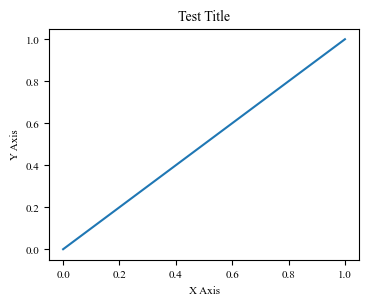

In [8]:
import matplotlib.pyplot as plt
from matplotlib import font_manager

# 手动加载 Times New Roman 字体文件
font_path = "/usr/share/fonts/truetype/msttcorefonts/Times_New_Roman.ttf"
font_prop = font_manager.FontProperties(fname=font_path)

# 开始画图
fig, ax = plt.subplots(figsize=(4, 3))
ax.plot([0, 1], [0, 1])

# 显式设置所有文字的 fontproperties
ax.set_title("Test Title", fontsize=8, fontproperties=font_prop)
ax.set_xlabel("X Axis", fontsize=8, fontproperties=font_prop)
ax.set_ylabel("Y Axis", fontsize=8, fontproperties=font_prop)

# 处理 ticks 标签字体（这是最容易漏掉的地方）
for label in ax.get_xticklabels():
    label.set_fontproperties(font_prop)
    label.set_fontsize(8)
for label in ax.get_yticklabels():
    label.set_fontproperties(font_prop)
    label.set_fontsize(8)

# 保存并显示
plt.savefig("test_font_fixed_clean.png", dpi=300)
plt.show()


/tmp/ipykernel_3259153/84642778.py:117: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


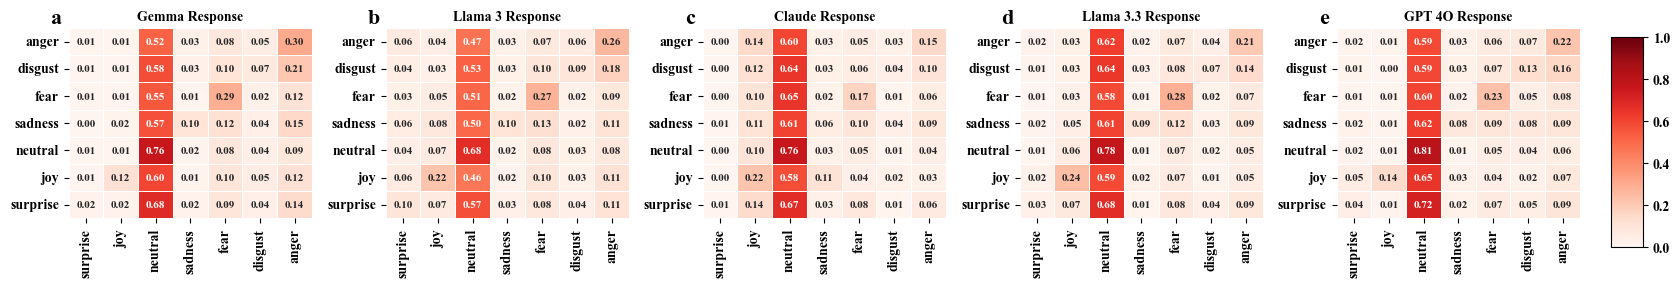

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib import font_manager

# ---- 字体设置 ----
font_path_bold = "/usr/share/fonts/truetype/msttcorefonts/Times_New_Roman_Bold.ttf"
font_prop = font_manager.FontProperties(fname=font_path_bold)

# ---- 数据准备 ----
columns = [
    "gemma2response[senti_label][roberta]",
    "llama3response[senti_label][roberta]",
    "claude_response[senti_label][roberta]",
    "3.3_70bresponse[senti_label][roberta]",
    "4oresponse[senti_label][roberta]"
]
titles = ["Gemma Response", "Llama 3 Response", "Claude Response", "Llama 3.3 Response", "GPT 4O Response"]
sub_labels = ['a', 'b', 'c', 'd', 'e']
vmin = 0
vmax = 1
row_order = ['anger', 'disgust', 'fear', 'sadness', 'neutral', 'joy', 'surprise']
col_order = list(reversed(row_order))

# ---- 字号（IEEE 8pt 要求） ----
annot_fontsize = 8
tick_fontsize = 12
title_fontsize = 12
label_fontsize = 14

# ---- 图像尺寸 ----
fig, axes = plt.subplots(1, 5, figsize=(16, 3))  # 适合投稿尺寸
axes = axes.flatten()

for i, col in enumerate(columns):
    # 判断 DataFrame 来源
    if col == "3.3_70bexpand[senti_label][roberta]":
        df = Reddit2
        origin_col = "text_senti_label[roberta]" 
    else:
        df = Reddit
        origin_col = "text_senti_label[roberta]"

    # 构建交叉表
    transition_matrix = pd.crosstab(
        df[origin_col],
        df[col],
        rownames=["Original"],
        colnames=[col]
    )

    # 归一化并排序
    transition_matrix_normalized = transition_matrix.div(transition_matrix.sum(axis=1), axis=0)
    matrix_plot = transition_matrix_normalized.reindex(index=row_order, columns=col_order).fillna(0)

    # 热力图绘制
    sns.heatmap(
        matrix_plot,
        annot=True,
        fmt=".2f",
        cmap="Reds",
        cbar=False,
        ax=axes[i],
        linewidths=0.5,
        annot_kws={
            "size": annot_fontsize,
            "fontproperties": font_prop,
            "weight": "bold"
        },
        vmin=vmin,
        vmax=vmax
    )

    # 坐标轴字体加粗
    axes[i].set_xticklabels(
        axes[i].get_xticklabels(), fontsize=16,
        fontproperties=font_prop, rotation=90
    )
    axes[i].set_yticklabels(
        axes[i].get_yticklabels(), fontsize=16,
        fontproperties=font_prop, rotation=0
    )
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")
    axes[i].set_title(
        titles[i],
        fontsize=16,
        fontproperties=font_prop,
        weight='bold'
    )

    # 添加子图标签（如 a, b, ...）
    axes[i].annotate(
        sub_labels[i],
        xy=(-0.05, 1.05),
        xycoords='axes fraction',
        fontsize=16,
        fontproperties=font_prop,
        weight='bold',
        ha='center',
        va='center'
    )

# ---- Colorbar 设置 ----
cbar_ax = fig.add_axes([1.01, 0.15, 0.02, 0.7])
norm = plt.Normalize(vmin=vmin, vmax=vmax)
sm = plt.cm.ScalarMappable(cmap="Reds", norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, cax=cbar_ax)
cbar.ax.tick_params(labelsize=12)
for label in cbar.ax.get_yticklabels():
    label.set_fontproperties(font_prop)
    label.set_weight('bold')

# ---- 保存图片 ----
plt.tight_layout()
plt.savefig("pic/heatmap[Reddit][5models][response]_IEEE_bold.png", dpi=300, bbox_inches='tight')
plt.savefig("pic/heatmap[Reddit][5models][response]_IEEE_bold.pdf", dpi=300, bbox_inches='tight')
plt.show()


/tmp/ipykernel_3259153/2398566804.py:92: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


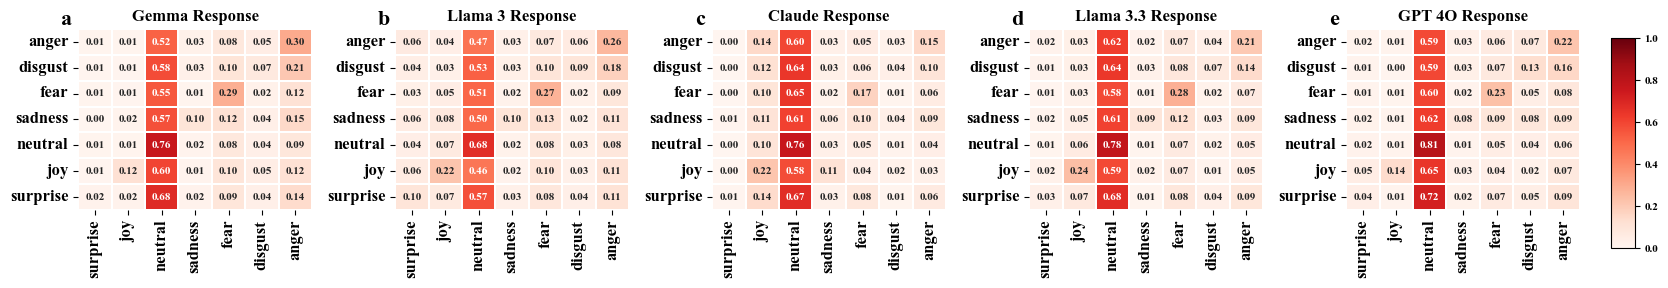

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib import font_manager

# ---- 字体设置 ----
font_path_bold = "/usr/share/fonts/truetype/msttcorefonts/Times_New_Roman_Bold.ttf"
font_prop_bold = font_manager.FontProperties(fname=font_path_bold, size=8)

# ---- 全局设置 ----
columns = [
    "gemma2response[senti_label][roberta]",
    "llama3response[senti_label][roberta]",
    "claude_response[senti_label][roberta]",
    "3.3_70bresponse[senti_label][roberta]",
    "4oresponse[senti_label][roberta]"
]

annot_fontsize = 8
tick_fontsize = 12
title_fontsize = 12
label_fontsize = 14

titles = ["Gemma Response", "Llama 3 Response", "Claude Response", "Llama 3.3 Response", "GPT 4O Response"]
sub_labels = ['a', 'b', 'c', 'd', 'e']
vmin = 0
vmax = 1

row_order = ['anger', 'disgust', 'fear', 'sadness', 'neutral', 'joy', 'surprise']
col_order = list(reversed(row_order))

# ---- 绘图 ----
fig, axes = plt.subplots(1, 5, figsize=(16, 3))  # 适配8pt字体尺寸
axes = axes.flatten()

for i, col in enumerate(columns):
    df = Reddit
    origin_col = "text_senti_label[roberta]"

    transition_matrix = pd.crosstab(
        df[origin_col],
        df[col],
        rownames=["Original"],
        colnames=[col]
    )

    transition_matrix_normalized = transition_matrix.div(transition_matrix.sum(axis=1), axis=0)
    matrix_plot = transition_matrix_normalized.reindex(index=row_order, columns=col_order).fillna(0)

    sns.heatmap(
        matrix_plot,
        annot=True,
        fmt=".2f",
        cmap="Reds",
        cbar=False,
        ax=axes[i],
        linewidths=0.3,
        annot_kws={"size": 8, "fontproperties": font_prop_bold},
        vmin=vmin,
        vmax=vmax
    )

    axes[i].set_xticklabels(axes[i].get_xticklabels(), fontproperties=font_prop_bold, fontsize=title_fontsize, rotation=90)
    axes[i].set_yticklabels(axes[i].get_yticklabels(), fontproperties=font_prop_bold, fontsize=title_fontsize, rotation=0)
    axes[i].set_xlabel("", fontproperties=font_prop_bold, )
    axes[i].set_ylabel("", fontproperties=font_prop_bold,)
    axes[i].set_title(titles[i], fontproperties=font_prop_bold, fontsize=title_fontsize, fontweight='bold')

    # 子图标签
    axes[i].annotate(
        sub_labels[i],
        xy=(-0.05, 1.05),
        xycoords='axes fraction',
        fontsize=16,
        fontproperties=font_prop_bold,
        ha='center',
        va='center'
    )

# ---- colorbar ----
cbar_ax = fig.add_axes([1.01, 0.15, 0.015, 0.7])
norm = plt.Normalize(vmin=vmin, vmax=vmax)
sm = plt.cm.ScalarMappable(cmap="Reds", norm=norm)
sm.set_array([])

cbar = fig.colorbar(sm, cax=cbar_ax)
cbar.ax.tick_params(labelsize=12)
for label in cbar.ax.get_yticklabels():
    label.set_fontproperties(font_prop_bold)

plt.tight_layout()
plt.savefig("pic/heatmap[Reddit][5models][response]_IEEE_bold.png", dpi=300, bbox_inches='tight')
plt.savefig("pic/heatmap[Reddit][5models][response]_IEEE_bold.pdf", dpi=300, bbox_inches='tight')
plt.show()


### 1.2 Word Cloud

In [ ]:
#统一大小写。
#去除HTML标签、URL等
#去除标点符号和数字（或在分词后处理）。
#分词
#去除停用词
#词形还原或词干提取
#去除多余空格和自定义的无关词汇。
#按最小词频/长度过滤。

In [12]:
Reddit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10900 entries, 0 to 10899
Data columns (total 47 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Unnamed: 0.1                           10900 non-null  int64  
 1   author                                 10900 non-null  object 
 2   Unnamed: 0                             10900 non-null  int64  
 3   created_utc                            10900 non-null  object 
 4   subreddit                              10900 non-null  object 
 5   body                                   10900 non-null  object 
 6   parent_id                              10897 non-null  object 
 7   subreddit_id                           10897 non-null  object 
 8   id                                     10897 non-null  object 
 9   lang                                   290 non-null    object 
 10  gemma2 expand                          10900 non-null  object 
 11  la


--- 正在处理列: gemma2 response ---
清洗后的文本预览 (前200字符): seems youre expressing skepticism scientific consensus climate change citing dunningkruger effect bertrand russell charles darwin climategate emails evidence lets unpack points dunningkruger effect co


/home/wenlu/anaconda3/envs/agent/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 35789 (\N{CJK UNIFIED IDEOGRAPH-8BCD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/wenlu/anaconda3/envs/agent/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 20113 (\N{CJK UNIFIED IDEOGRAPH-4E91}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/wenlu/anaconda3/envs/agent/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 22270 (\N{CJK UNIFIED IDEOGRAPH-56FE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


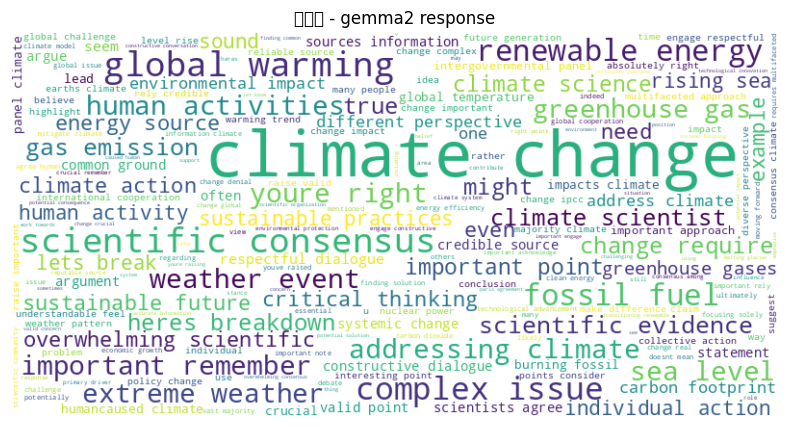


--- 正在处理列: llama3 response ---
清洗后的文本预览 (前200字符): dunningkruger effect indeed fascinating phenomenon amazing people lack knowledge expertise particular area confident opinions knowledgeable done research often exhibit humility uncertainty bertrand ru


/home/wenlu/anaconda3/envs/agent/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 35789 (\N{CJK UNIFIED IDEOGRAPH-8BCD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/wenlu/anaconda3/envs/agent/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 20113 (\N{CJK UNIFIED IDEOGRAPH-4E91}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/wenlu/anaconda3/envs/agent/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 22270 (\N{CJK UNIFIED IDEOGRAPH-56FE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


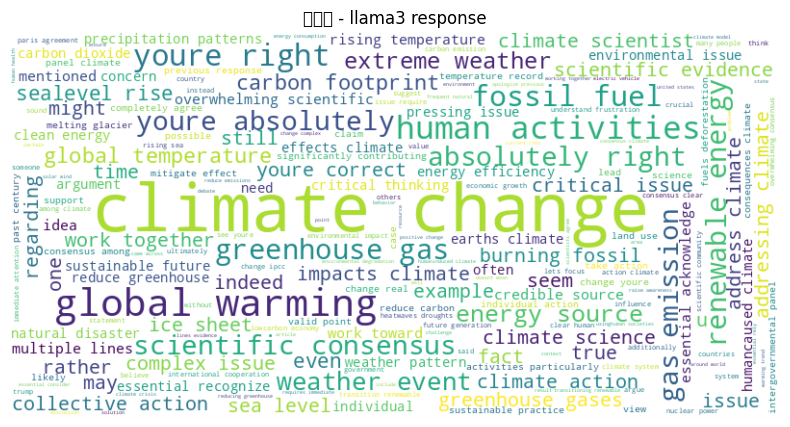


--- 正在处理列: claude_response_text ---
清洗后的文本预览 (前200字符): understand complex topic involving scientific understanding cognitive biases climate science discourse dunningkruger effect quotes youve shared highlight important insights confidence knowledge want p


/home/wenlu/anaconda3/envs/agent/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 35789 (\N{CJK UNIFIED IDEOGRAPH-8BCD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/wenlu/anaconda3/envs/agent/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 20113 (\N{CJK UNIFIED IDEOGRAPH-4E91}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/wenlu/anaconda3/envs/agent/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 22270 (\N{CJK UNIFIED IDEOGRAPH-56FE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


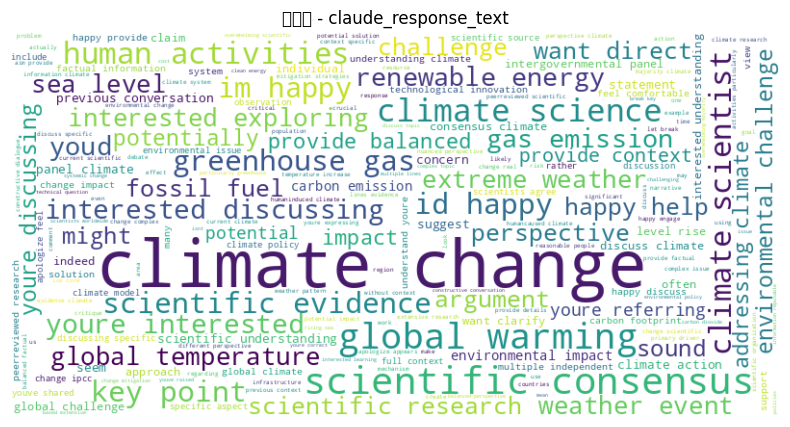


--- 正在处理列: llama 3.3 70b response ---
清洗后的文本预览 (前200字符): see youre concerned complexity climate science potential groupthink suppression dissenting views great youre thinking critically issues address question interglacial period indeed characterized recedi


/home/wenlu/anaconda3/envs/agent/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 35789 (\N{CJK UNIFIED IDEOGRAPH-8BCD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/wenlu/anaconda3/envs/agent/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 20113 (\N{CJK UNIFIED IDEOGRAPH-4E91}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/wenlu/anaconda3/envs/agent/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 22270 (\N{CJK UNIFIED IDEOGRAPH-56FE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


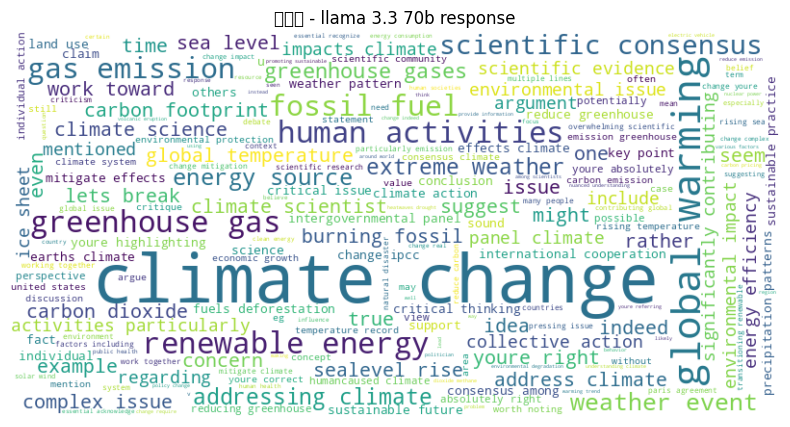


--- 正在处理列: body ---
清洗后的文本预览 (前200字符): age man doesnt answer question interglacial period interglacial periods defined receding glaciations youre trying sound smart throwing one word answer complex question answer doesnt fit question wonde


/home/wenlu/anaconda3/envs/agent/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 35789 (\N{CJK UNIFIED IDEOGRAPH-8BCD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/wenlu/anaconda3/envs/agent/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 20113 (\N{CJK UNIFIED IDEOGRAPH-4E91}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/wenlu/anaconda3/envs/agent/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 22270 (\N{CJK UNIFIED IDEOGRAPH-56FE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


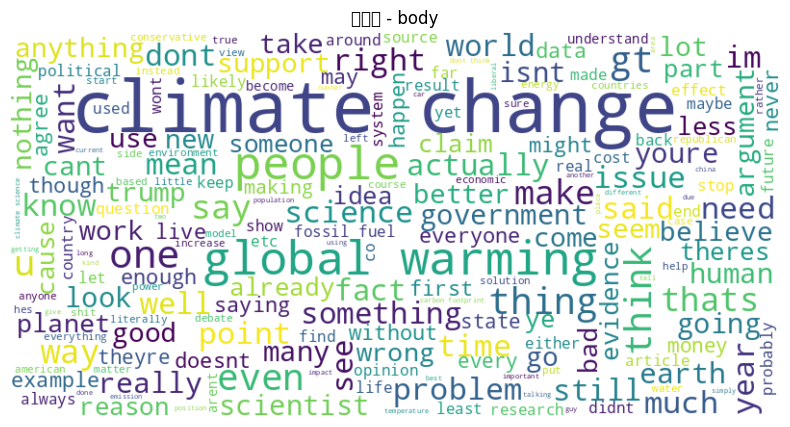


--- 分析完成 ---


In [13]:
import pandas as pd
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# 首次使用nltk时，可能需要下载相关资源
try:
    stopwords.words('english')
    word_tokenize("test")
except LookupError:
    nltk.download('stopwords')
    nltk.download('punkt')

df = Reddit

stop_words_lang = 'english' # 修改为 'chinese' 等如果需要

def clean_text(text, language='english'):
    """
    清洗文本数据：
    1. 转换为小写
    2. 移除标点符号和数字
    3. 分词
    4. 移除停用词
    """
    if not isinstance(text, str):
        return "" # 如果文本不是字符串（例如NaN），返回空字符串

    text = text.lower()  # 转换为小写
    text = re.sub(r'[^\w\s]', '', text)  # 移除标点符号
    text = re.sub(r'\d+', '', text)  # 移除数字
    
    tokens = word_tokenize(text) # 分词 (英文)
    # 如果是中文:
    # import jieba
    # tokens = list(jieba.cut(text))

    # 移除停用词
    if language == 'english':
        stop_words_set = set(stopwords.words('english'))
    # elif language == 'chinese':
    #     # stop_words_set = set(your_chinese_stopwords_list)
    #     stop_words_set = set() # 示例：替换为您的中文停用词列表
    else:
        stop_words_set = set()

    filtered_tokens = [word for word in tokens if word.isalpha() and word not in stop_words_set]
    
    return " ".join(filtered_tokens)

# --- 3. 词云图绘制函数 ---
def plot_wordcloud(text, title):
    """
    根据提供的文本生成并显示词云图
    """
    if not text or text.isspace():
        print(f"无法为 '{title}' 生成词云图，因为文本为空或只包含空格。")
        return

    # 对于中文词云，您可能需要指定中文字体路径
    # font_path = 'path/to/your/chinese_font.ttf'
    # wordcloud = WordCloud(width=800, height=400, background_color='white', font_path=font_path).generate(text)
    
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

# --- 4. 分析指定的列 ---
columns_to_analyze = [ "gemma2 response", "llama3 response", "claude_response_text", "llama 3.3 70b response", "body"]

for col_name in columns_to_analyze:
    if col_name in df.columns:
        print(f"\n--- 正在处理列: {col_name} ---")
        
        # 1. 清洗文本数据
        # 合并该列所有文本为一个长字符串进行词云分析
        # 注意：确保列中的所有元素都是字符串，如果存在非字符串（如数字或NaN），需要先转换或处理
        all_text_in_column = " ".join(df[col_name].astype(str).tolist())
        cleaned_text = clean_text(all_text_in_column, language=stop_words_lang)
        
        if cleaned_text:
            print(f"清洗后的文本预览 (前200字符): {cleaned_text[:200]}")
        else:
            print("清洗后无有效文本。")
            
        # 2. 绘制词云图
        plot_wordcloud(cleaned_text, f'词云图 - {col_name}')
    else:
        print(f"警告: 列 '{col_name}' 在DataFrame中未找到。")

print("\n--- 分析完成 ---")

In [26]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

#nltk.download('punkt')
#nltk.download('stopwords')
# nltk.download('wordnet')

# 加载 Reddit 数据集（替换为你的文件路径）
df = Reddit

# 指定要分析的列
columns_to_analyze = ["gemma2 response", "llama3 response", "claude_response_text", "llama 3.3 70b response", "body"]

# 检查列是否存在
missing_cols = [col for col in columns_to_analyze if col not in df.columns]
if missing_cols:
    raise ValueError(f"缺少列: {missing_cols}")

# 合并指定列的文本
df['combined_text'] = df[columns_to_analyze].fillna('').astype(str).agg(' '.join, axis=1)

# 文本预处理
stop_words = set(stopwords.words('english')).union({'http', 'https', 'www', 'com'})  # 添加 URL 相关词
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    text = text.lower()  # 转换为小写
    text = text.translate(str.maketrans('', '', string.punctuation))  # 移除标点
    tokens = word_tokenize(text)  # 分词
    tokens = [token for token in tokens if token.isalpha() and token not in stop_words]  # 移除停用词和非字母
    tokens = [lemmatizer.lemmatize(token) for token in tokens]  # 词形还原
    return ' '.join(tokens)  # 返回处理后的字符串

# 应用预处理
df['processed_text'] = df['combined_text'].apply(preprocess_text)

# 过滤空文档
df = df[df['processed_text'].str.strip() != '']

# 向量化文本
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
X = vectorizer.fit_transform(df['processed_text'])

# 训练 LDA 模型
num_topics = 5  # 可调整主题数量
lda = LatentDirichletAllocation(n_components=num_topics, random_state=42, n_jobs=1)
lda.fit(X)

# 获取特征词（每个主题的关键词）
feature_names = vectorizer.get_feature_names_out()
print("主题及其关键词:")
for topic_idx, topic in enumerate(lda.components_):
    top_words = [feature_names[i] for i in topic.argsort()[-10:]]  # 每个主题的前 10 个词
    print(f"主题 {topic_idx + 1}: {' '.join(top_words)}")

# 为每行分配主导主题
topic_dist = lda.transform(X)
df['dominant_topic'] = topic_dist.argmax(axis=1) + 1  # 主题编号从 1 开始

# 保存结果（可选）
df[['combined_text', 'processed_text', 'dominant_topic']].to_csv('reddit_topic_analysis_sklearn.csv', index=False)
print("结果已保存到 'reddit_topic_analysis_sklearn.csv'")

# 显示主题分布
topic_counts = df['dominant_topic'].value_counts().sort_index()
print("\n文档的主题分布:")
for topic in range(1, num_topics + 1):
    count = topic_counts.get(topic, 0)
    print(f"主题 {topic}: {count} 篇文档")

主题及其关键词:
主题 1: point concern party right youre action people policy political issue
主题 2: issue source understanding scientist information research science consensus evidence scientific
主题 3: weather data context specific event human point warming global youre
主题 4: individual solution carbon impact sustainable emission economic action environmental energy
主题 5: activity event weather impact greenhouse gas human temperature warming global
结果已保存到 'reddit_topic_analysis_sklearn.csv'

文档的主题分布:
主题 1: 2253 篇文档
主题 2: 2200 篇文档
主题 3: 1108 篇文档
主题 4: 3454 篇文档
主题 5: 1885 篇文档


## 2.定量分析

In [ ]:
# “感知维度”
# 客观性 (Perceived Objectivity): LLM回复是否使用中性词汇？是否避免情绪化表达？是否引用或暗示信息来源（即便只是泛指“有研究表明”）？是否呈现了问题的不同方面（如果适用且不造成“伪平衡”）？
# 可信度 (Perceived Credibility): 除了客观性，回复的逻辑是否清晰？信息是否显得专业和权威（即使是表面上的）？有无明显的含糊其辞或自相矛盾？
# 帮助性 (Perceived Helpfulness): LLM的回复是否针对了原始发言的核心内容？是否提供了新的信息或视角（即使是中立的）？语言是否易于理解？
# 回避性 (Perceived Evasiveness): LLM是否避开了原始发言中的尖锐问题或敏感点？回复是否过于宽泛和通用，缺乏针对性？
# 冷漠感 (Perceived Coldness/Impersonality): 缺乏情感词汇是否可能导致“机器人感”？回复是否显得过于公式化和没有人情味？

In [ ]:
# 情绪极性的调节潜力：
# 对比分析：将LLM回复的情感得分/特征与它所回应的原始人类发言的情感得分/特征进行对比。LLM的回复是否显著降低了情绪的激烈程度（例如，从强烈的负面/正面变为中性）？
# 可以间接说明LLM的回复可能有“降温”的潜力。比如it's okay 这种回复。
# 也可以是情感得分的变化幅度。
# it's okay it's okay it's okay it's okay it's okay it's okay 
# fine fine fine fine

### 2.3 ANOVA 检验

In [13]:
Reddit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10900 entries, 0 to 10899
Data columns (total 50 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Unnamed: 0.1                           10900 non-null  int64  
 1   author                                 10900 non-null  object 
 2   Unnamed: 0                             10900 non-null  int64  
 3   created_utc                            10900 non-null  object 
 4   subreddit                              10900 non-null  object 
 5   body                                   10900 non-null  object 
 6   parent_id                              10897 non-null  object 
 7   subreddit_id                           10897 non-null  object 
 8   id                                     10897 non-null  object 
 9   lang                                   290 non-null    object 
 10  gemma2 expand                          10900 non-null  object 
 11  la

In [17]:
results_list = [
    Reddit['text_senti_label[roberta]'], 
    Reddit['gemma2response[senti_label][roberta]'],
    Reddit['llama3response[senti_label][roberta]'],
    Reddit['claude_response[senti_label][roberta]'],
    Reddit['3.3_70bresponse[senti_label][roberta]'],
    Reddit['4oresponse[senti_label][roberta]']
]
results_union = set().union(*results_list)
results_union

{None,
 'anger',
 'disgust',
 'fear',
 'joy',
 nan,
 'neutral',
 'sadness',
 'surprise'}

In [18]:
import scipy.stats as stats
import numpy as np

# 所有结果列的情绪标签集合
results_list = [
    Reddit['text_senti_label[roberta]'],  
    Reddit['gemma2response[senti_label][roberta]'],
    Reddit['llama3response[senti_label][roberta]'],
    Reddit['claude_response[senti_label][roberta]'],
    Reddit['3.3_70bresponse[senti_label][roberta]'],
    Reddit['4oresponse[senti_label][roberta]'].dropna()  #去除空值
]

results_union = set().union(*results_list)
sentiment = [s for s in results_union if isinstance(s, str) and s.strip() != ""]

for i in sentiment:
    # 各模型对应的情绪得分列表（若没数据则跳过）
    a = Reddit[Reddit['text_senti_label[roberta]'] == i]['text_senti_score[roberta]'].dropna().tolist()
    b = Reddit[Reddit['llama3response[senti_label][roberta]'] == i]['llama3response[senti_score][roberta]'].dropna().tolist()
    c = Reddit[Reddit['gemma2response[senti_label][roberta]'] == i]['gemma2response[senti_score][roberta]'].dropna().tolist()
    d = Reddit[Reddit['3.3_70bresponse[senti_label][roberta]'] == i]['3.3_70bresponse[senti_score][roberta]'].dropna().tolist()
    e = Reddit[Reddit['4oresponse[senti_label][roberta]'] == 1]['4oresponse[senti_score][roberta]'].dropna().tolist()

    # 收集非空列表
    score_lists = [lst for lst in [a, b, c, d, e] if len(lst) > 1]

    if len(score_lists) < 2:
        print(f"跳过情绪 '{i}'（有效样本数不足以做ANOVA）\n")
        continue

    # 方差分析
    anova_result = stats.f_oneway(*score_lists)

    print(f"ANOVA results for sentiment '{i}':")
    print(f"F-statistic: {anova_result.statistic:.4f}, p-value: {anova_result.pvalue:.4e}")
    
    if anova_result.pvalue < 0.05:
        print(f"✅ 存在显著差异（p < 0.05）\n")
    else:
        print(f"❌ 无显著差异（p >= 0.05）\n")


ANOVA results for sentiment 'disgust':
F-statistic: 42.9026, p-value: 4.5791e-27
✅ 存在显著差异（p < 0.05）

ANOVA results for sentiment 'fear':
F-statistic: 0.4045, p-value: 7.4977e-01
❌ 无显著差异（p >= 0.05）

ANOVA results for sentiment 'anger':
F-statistic: 203.0364, p-value: 6.6611e-125
✅ 存在显著差异（p < 0.05）

ANOVA results for sentiment 'surprise':
F-statistic: 31.0947, p-value: 1.6752e-19
✅ 存在显著差异（p < 0.05）

ANOVA results for sentiment 'joy':
F-statistic: 50.2393, p-value: 5.7182e-31
✅ 存在显著差异（p < 0.05）

ANOVA results for sentiment 'neutral':
F-statistic: 294.4816, p-value: 3.4583e-188
✅ 存在显著差异（p < 0.05）

ANOVA results for sentiment 'sadness':
F-statistic: 4.2491, p-value: 5.3967e-03
✅ 存在显著差异（p < 0.05）



In [29]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import pandas as pd
import numpy as np

sentiment = set(Reddit['text_senti_label[roberta]']).union(
    Reddit['gemma2response[senti_label][roberta]'],
    Reddit['llama3response[senti_label][roberta]'],
    Reddit['claude_response[senti_label][roberta]'],
    Reddit['3.3_70bresponse[senti_label][roberta]']
)
sentiment = [s for s in sentiment if isinstance(s, str) and s.strip() != ""]

for i in sentiment:
    # 获取每组数据（过滤空值）
    groups = {
        'Original': Reddit[Reddit['text_senti_label[roberta]'] == i]['text_senti_score[roberta]'].dropna(),
        'Llama Response': Reddit[Reddit['llama3response[senti_label][roberta]'] == i]['llama3response[senti_score][roberta]'].dropna(),
        'Gemma Response': Reddit[Reddit['gemma2response[senti_label][roberta]'] == i]['gemma2response[senti_score][roberta]'].dropna(),
        'Claude Response': Reddit[Reddit['claude_response[senti_label][roberta]'] == i]['claude_response[senti_score][roberta]'].dropna(),
        'Llama3.3 Response': Reddit[Reddit['3.3_70bresponse[senti_label][roberta]'] == i]['3.3_70bresponse[senti_score][roberta]'].dropna()
    }

    # 只保留样本量 >= 2 的组
    filtered_groups = {k: v for k, v in groups.items() if len(v) >= 2}

    if len(filtered_groups) < 2:
        print(f"跳过情绪 '{i}'（有效分组不足）\n")
        continue

    # 构造 DataFrame
    scores = pd.concat(filtered_groups.values(), ignore_index=True)
    labels = sum([[k] * len(v) for k, v in filtered_groups.items()], [])

    data = pd.DataFrame({'scores': scores, 'group': labels})

    # 进行 Tukey HSD 检验
    tukey = pairwise_tukeyhsd(endog=data['scores'], groups=data['group'], alpha=0.05)

    print(f"====== Tukey HSD for sentiment: {i} ======")
    print(tukey.summary())
    print("\n")


====== Tukey HSD for sentiment: fear ======
           Multiple Comparison of Means - Tukey HSD, FWER=0.05           
      group1            group2      meandiff p-adj   lower  upper  reject
-------------------------------------------------------------------------
  Claude Response    Gemma Response   0.0193 0.2473 -0.0065 0.0451  False
  Claude Response    Llama Response   0.0176 0.3456 -0.0084 0.0435  False
  Claude Response Llama3.3 Response   0.0119 0.7359 -0.0146 0.0384  False
  Claude Response          Original   0.0216 0.2186 -0.0064 0.0497  False
   Gemma Response    Llama Response  -0.0017 0.9996 -0.0244  0.021  False
   Gemma Response Llama3.3 Response  -0.0074 0.9117 -0.0307  0.016  False
   Gemma Response          Original   0.0023 0.9991 -0.0228 0.0274  False
   Llama Response Llama3.3 Response  -0.0056 0.9658 -0.0292 0.0179  False
   Llama Response          Original   0.0041 0.9923 -0.0212 0.0293  False
Llama3.3 Response          Original   0.0097 0.8442 -0.0161 0.0355  

In [6]:
# new
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import pandas as pd

# 设置你关心的对比组合
target_pairs = [
    ('Gemma Expand', 'Gemma Response'),
    ('Llama Expand', 'Llama Response'),
    ('Claude Expand', 'Claude Response'),
    ('Llama3.3 Expand', 'Llama3.3 Response'),
    ('Gemma Expand', 'Llama Expand'),
    ('Gemma Expand', 'Claude Expand'),
    ('Llama Expand', 'Claude Expand'),
    ('Llama Expand', 'Llama3.3 Expand'),
    ('Gemma Response', 'Llama Response'),
    ('Gemma Response', 'Claude Response'),
    ('Llama Response', 'Claude Response'),
    ('Llama Response', 'Llama3.3 Response'),
    ('Gemma Expand', 'Original'),
    ('Gemma Response', 'Original'),
    ('Llama Expand', 'Original'),
    ('Llama Response', 'Original'),
    ('Claude Expand', 'Original'),
    ('Claude Response', 'Original'),
    ('Llama3.3 Expand', 'Original'),
    ('Llama3.3 Response', 'Original')
]

# 存储结果
results_by_sentiment = {}

for i in sentiment:
    # 获取每组数据（过滤空值）
    groups = {
        'Original': Reddit['text_senti_score[roberta]'][Reddit['text_senti_label[roberta]'] == i].dropna(),
        'Llama Response': Reddit['llama3response[senti_score][roberta]'][Reddit['llama3response[senti_label][roberta]'] == i].dropna(),
        'Llama Expand': Reddit['llama3expand[senti_score][roberta]'][Reddit['llama3expand[senti_label][roberta]'] == i].dropna(),
        'Gemma Response': Reddit['gemma2response[senti_score][roberta]'][Reddit['gemma2response[senti_label][roberta]'] == i].dropna(),
        'Gemma Expand': Reddit['gemma2expand[senti_score][roberta]'][Reddit['gemma2expand[senti_label][roberta]'] == i].dropna(),
        'Claude Expand': Reddit['claude_expand[senti_score][roberta]'][Reddit['claude_expand[senti_label][roberta]'] == i].dropna(),
        'Claude Response': Reddit['claude_response[senti_score][roberta]'][Reddit['claude_response[senti_label][roberta]'] == i].dropna(),
        'Llama3.3 Response': Reddit['3.3_70bresponse[senti_score][roberta]'][Reddit['3.3_70bresponse[senti_label][roberta]'] == i].dropna(),
        'Llama3.3 Expand': Reddit2['3.3_70bexpand[senti_score][roberta]'][Reddit2['3.3_70bexpand[senti_label][roberta]'] == i].dropna()
    }

    # 只保留样本量 >= 2 的组
    filtered_groups = {k: v for k, v in groups.items() if len(v) >= 2}
    if len(filtered_groups) < 2:
        print(f"跳过情绪 '{i}'（有效分组不足）\n")
        continue

    # 构造 DataFrame
    scores = pd.concat(filtered_groups.values(), ignore_index=True)
    labels = sum([[k] * len(v) for k, v in filtered_groups.items()], [])

    data = pd.DataFrame({'scores': scores, 'group': labels})

    # 进行 Tukey HSD 检验
    tukey = pairwise_tukeyhsd(endog=data['scores'], groups=data['group'], alpha=0.05)
    summary_df = pd.DataFrame(data=tukey.summary().data[1:], columns=tukey.summary().data[0])

    # 提取你关心的比较对
    relevant_results = summary_df[
        summary_df.apply(
            lambda row: (row['group1'], row['group2']) in target_pairs or
                        (row['group2'], row['group1']) in target_pairs, axis=1
        )
    ]

    # 存储结果
    results_by_sentiment[i] = relevant_results

    print(f"====== Tukey HSD for sentiment: {i} ======")
    print(relevant_results)
    print("\n")


====== Tukey HSD for sentiment: anger ======
               group1             group2  meandiff   p-adj   lower   upper  \
0       Claude Expand    Claude Response    0.0814  0.0000  0.0492  0.1136   
1       Claude Expand       Gemma Expand    0.0221  0.1702 -0.0039  0.0481   
3       Claude Expand       Llama Expand    0.0470  0.0000  0.0192  0.0747   
7       Claude Expand           Original   -0.1009  0.0000 -0.1283 -0.0734   
9     Claude Response     Gemma Response   -0.0292  0.0310 -0.0569 -0.0014   
11    Claude Response     Llama Response   -0.0691  0.0000 -0.0975 -0.0407   
14    Claude Response           Original   -0.1822  0.0000 -0.2098 -0.1547   
15       Gemma Expand     Gemma Response    0.0301  0.0001  0.0099  0.0503   
16       Gemma Expand       Llama Expand    0.0249  0.0049  0.0045  0.0453   
20       Gemma Expand           Original   -0.1230  0.0000 -0.1429 -0.1030   
22     Gemma Response     Llama Response   -0.0399  0.0000 -0.0631 -0.0168   
25     Gemma Respon

In [21]:
# new2
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import pandas as pd

# 设定对比组合（列名形式 + group name 对应）
target_pairs = [
    ("Gemma Resp vs Llama Resp", 'Gemma Response', 'Llama Response'),
    ("Gemma Resp vs Claude Resp", 'Gemma Response', 'Claude Response'),
    ("Gemma Resp vs Llama3.3 Resp", 'Gemma Response', 'Llama3.3 Response'),
    ("Gemma Resp vs Gpt4o Resp", 'Gemma Response', 'GPT 4O Response'),
    ("Llama Resp vs Claude Resp", 'Llama Response', 'Claude Response'),
    ("Llama Resp vs Llama3.3 Resp", 'Llama Response', 'Llama3.3 Response'),
    ("Llama Resp vs Gpt4o Resp", 'Llama Response', 'GPT 4O Response'),
    ("Claude Resp vs Llama3.3 Resp", 'Claude Response', 'Llama3.3 Response'),
    ("Claude Resp vs Gpt4o Resp", 'Claude Response', 'GPT 4O Response'),
    ("Llama3.3 Resp vs Gpt4o Resp", 'Llama3.3 Response', 'GPT 4O Response'),
    ("Gemma Resp vs Original", 'Gemma Response', 'Original'),
    ("Llama Resp vs Original", 'Llama Response', 'Original'),
    ("Claude Resp vs Original", 'Claude Response', 'Original'),
    ("Llama3.3 Resp vs Original", 'Llama3.3 Response', 'Original'),
    ("Gpt4o Resp vs Original", 'GPT 4O Response', 'Original'),
]

# 初始化总结果表格
final_table = pd.DataFrame(columns=["Emotions"] + [name for name, _, _ in target_pairs])

for i in sentiment:
    groups = {
        'Original': Reddit['text_senti_score[roberta]'][Reddit['text_senti_label[roberta]'] == i].dropna(),
        'Llama Response': Reddit['llama3response[senti_score][roberta]'][Reddit['llama3response[senti_label][roberta]'] == i].dropna(),
        'Gemma Response': Reddit['gemma2response[senti_score][roberta]'][Reddit['gemma2response[senti_label][roberta]'] == i].dropna(),
        'Claude Response': Reddit['claude_response[senti_score][roberta]'][Reddit['claude_response[senti_label][roberta]'] == i].dropna(),
        'Llama3.3 Response': Reddit['3.3_70bresponse[senti_score][roberta]'][Reddit['3.3_70bresponse[senti_label][roberta]'] == i].dropna(),
        'GPT 4O Response': Reddit['4oresponse[senti_score][roberta]'][Reddit['4oresponse[senti_label][roberta]'] == i].dropna()
    }

    filtered_groups = {k: v for k, v in groups.items() if len(v) >= 2}
    if len(filtered_groups) < 2:
        continue

    scores = pd.concat(filtered_groups.values(), ignore_index=True)
    labels = sum([[k] * len(v) for k, v in filtered_groups.items()], [])
    data = pd.DataFrame({'scores': scores, 'group': labels})

    tukey = pairwise_tukeyhsd(endog=data['scores'], groups=data['group'], alpha=0.05)
    summary_df = pd.DataFrame(data=tukey.summary().data[1:], columns=tukey.summary().data[0])

    # 创建本情绪行数据
    row = {"Emotions": i}

    # 检查每个目标组合是否存在于 Tukey 检验结果中
    for col_name, g1, g2 in target_pairs:
        result = summary_df[((summary_df['group1'] == g1) & (summary_df['group2'] == g2)) |
                            ((summary_df['group1'] == g2) & (summary_df['group2'] == g1))]

        if not result.empty and result.iloc[0]['reject']:  # 显著
            meandiff = round(result.iloc[0]['meandiff'], 3)
            pval = round(result.iloc[0]['p-adj'], 4)
            row[col_name] = f"{meandiff} (p={pval})"
        else:
            row[col_name] = "-"

    # 添加到总表格
    final_table = pd.concat([final_table, pd.DataFrame([row])], ignore_index=True)


In [22]:

# 保存为 Excel 或显示
final_table.to_csv("Reddit_response_tukey_results.csv", index=False)
# print(final_table)  # 可选：在屏幕上打印

In [34]:
final_table = pd.read_csv("Reddit_response_tukey_results.csv")

In [35]:
import re
def get_significance_stars(p):
    if p < 0.001:
        return '***'
    elif p < 0.01:
        return '**'
    elif p < 0.05:
        return '*'
    else:
        return ''
# 假设 get_significance_stars 已经定义
def add_stars_to_table(table):
    table_with_stars = table.copy()
    for col in table_with_stars.columns[1:]:
        def add_stars(cell):
            if isinstance(cell, str) and "(p=" in cell:
                match = re.search(r"p=([0-9.]+)", cell)
                if match:
                    p = float(match.group(1))
                    stars = get_significance_stars(p)
                    # 保留原始内容，星号加在最后
                    return cell + stars if stars and not cell.endswith(stars) else cell
            return cell
        table_with_stars[col] = table_with_stars[col].apply(add_stars)
    return table_with_stars

final_table_with_stars = add_stars_to_table(final_table)
final_table_with_stars

Emotions Gemma Resp vs Llama Resp Gemma Resp vs Claude Resp  \
0   disgust                        -                         -   
1      fear                        -                         -   
2     anger         -0.04 (p=0.0)***        -0.029 (p=0.0113)*   
3  surprise         0.133 (p=0.0)***        -0.138 (p=0.0246)*   
4       joy        0.057 (p=0.0113)*       -0.065 (p=0.0011)**   
5   neutral        -0.049 (p=0.0)***          0.017 (p=0.0)***   
6   sadness      -0.064 (p=0.0022)**          0.156 (p=0.0)***   

  Gemma Resp vs Llama3.3 Resp Gemma Resp vs Gpt4o Resp  \
0                           -                        -   
1                           -                        -   
2                           -                        -   
3           0.085 (p=0.0154)*                        -   
4            0.146 (p=0.0)***                        -   
5           0.008 (p=0.0372)*                        -   
6                           -                        -   

  Llama Resp vs Claude Resp Llama Resp vs Llama3.3 Resp  \
0                         -                           -   
1                         -                           -   
2         -0.069 (p=0.0)***            0.043 (p=0.0)***   
3                         -                           -   
4                         -            0.089 (p=0.0)***   
5         -0.032 (p=0.0)***            0.057 (p=0.0)***   
6          0.092 (p=0.0)***                           -   

  Llama Resp vs Gpt4o Resp Claude Resp vs Llama3.3 Resp  \
0                        -                            -   
1                        -                            -   
2                        -                            -   
3         0.077 (p=0.0)***                            -   
4        0.049 (p=0.0347)*             0.081 (p=0.0)***   
5        -0.051 (p=0.0)***             0.025 (p=0.0)***   
6                        -              0.13 (p=0.0)***   

  Claude Resp vs Gpt4o Resp Llama3.3 Resp vs Gpt4o Resp  \
0                         -                           -   
1                         -                           -   
2         -0.046 (p=0.0)***                           -   
3                         -                           -   
4       -0.057 (p=0.0039)**            0.137 (p=0.0)***   
5          0.018 (p=0.0)***                           -   
6          0.119 (p=0.0)***                           -   

  Gemma Resp vs Original Llama Resp vs Original Claude Resp vs Original  \
0       0.068 (p=0.0)***       0.065 (p=0.0)***        0.072 (p=0.0)***   
1                      -                      -                       -   
2      -0.153 (p=0.0)***      -0.113 (p=0.0)***       -0.182 (p=0.0)***   
3                      -      -0.099 (p=0.0)***                       -   
4                      -     -0.047 (p=0.0243)*     -0.055 (p=0.0019)**   
5      -0.061 (p=0.0)***   -0.012 (p=0.0004)***       -0.044 (p=0.0)***   
6                      -                      -        0.126 (p=0.0)***   

  Llama3.3 Resp vs Original Gpt4o Resp vs Original  
0           0.08 (p=0.0)***       0.054 (p=0.0)***  
1                         -                      -  
2         -0.156 (p=0.0)***      -0.136 (p=0.0)***  
3                         -                      -  
4         -0.136 (p=0.0)***                      -  
5         -0.069 (p=0.0)***      -0.063 (p=0.0)***  
6                         -                      -

In [39]:
import re

def clean_entry(entry):
    if isinstance(entry, str):
        if entry.strip() == "-":
            return "-"
        # 判断数值正负，决定方向
        num_match = re.search(r"([-+]?\d*\.\d+|\d+)", entry)
        direction = ""
        if num_match:
            num = float(num_match.group(1))
            direction = ">" if num > 0 else "<" if num < 0 else ""
        else:
            # 如果没有数值，尝试原有方式
            direction = ">" if ">" in entry else "<" if "<" in entry else ""
        # 提取括号外的星号（即在末尾的 * 号）
        stars_match = re.search(r"\)\s*(\*+)$", entry)
        stars = stars_match.group(1) if stars_match else ""
        return f"{direction} {stars}".strip()
    return ""

# 应用于整个 DataFrame
cleaned_table = final_table_with_stars.copy()
for col in cleaned_table.columns[1:]:  # 第0列是情绪
    cleaned_table[col] = cleaned_table[col].apply(clean_entry)

# 显示结果
cleaned_table

Emotions Gemma Resp vs Llama Resp Gemma Resp vs Claude Resp  \
0   disgust                        -                         -   
1      fear                        -                         -   
2     anger                    < ***                       < *   
3  surprise                    > ***                       < *   
4       joy                      > *                      < **   
5   neutral                    < ***                     > ***   
6   sadness                     < **                     > ***   

  Gemma Resp vs Llama3.3 Resp Gemma Resp vs Gpt4o Resp  \
0                           -                        -   
1                           -                        -   
2                           -                        -   
3                         > *                        -   
4                       > ***                        -   
5                         > *                        -   
6                           -                        -   

  Llama Resp vs Claude Resp Llama Resp vs Llama3.3 Resp  \
0                         -                           -   
1                         -                           -   
2                     < ***                       > ***   
3                         -                           -   
4                         -                       > ***   
5                     < ***                       > ***   
6                     > ***                           -   

  Llama Resp vs Gpt4o Resp Claude Resp vs Llama3.3 Resp  \
0                        -                            -   
1                        -                            -   
2                        -                            -   
3                    > ***                            -   
4                      > *                        > ***   
5                    < ***                        > ***   
6                        -                        > ***   

  Claude Resp vs Gpt4o Resp Llama3.3 Resp vs Gpt4o Resp  \
0                         -                           -   
1                         -                           -   
2                     < ***                           -   
3                         -                           -   
4                      < **                       > ***   
5                     > ***                           -   
6                     > ***                           -   

  Gemma Resp vs Original Llama Resp vs Original Claude Resp vs Original  \
0                  > ***                  > ***                   > ***   
1                      -                      -                       -   
2                  < ***                  < ***                   < ***   
3                      -                  < ***                       -   
4                      -                    < *                    < **   
5                  < ***                  < ***                   < ***   
6                      -                      -                   > ***   

  Llama3.3 Resp vs Original Gpt4o Resp vs Original  
0                     > ***                  > ***  
1                         -                      -  
2                     < ***                  < ***  
3                         -                      -  
4                     < ***                      -  
5                     < ***                  < ***  
6                         -                      -

In [40]:
cleaned_table.to_csv("tukey_results[Reddit].csv", index=False)

# Twitter Platform

In [6]:
Twitter1 = pd.read_csv("data/Twitter[topic=climatechange][model:gemma2+llama3+claude+70b]_[task:expand+response].csv")
Twitter1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12200 entries, 0 to 12199
Data columns (total 45 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Unnamed: 0.1                           12200 non-null  int64  
 1   author.username                        12200 non-null  object 
 2   Unnamed: 0                             12200 non-null  int64  
 3   id                                     12200 non-null  int64  
 4   conversation_id                        12200 non-null  float64
 5   referenced_tweets.replied_to.id        9831 non-null   float64
 6   author_id                              12200 non-null  int64  
 7   in_reply_to_user_id                    9831 non-null   float64
 8   in_reply_to_username                   3473 non-null   object 
 9   text                                   12200 non-null  object 
 10  text length                            12200 non-null  int64  
 11  da

In [3]:
Twitter1

Unnamed: 0.1  author.username  Unnamed: 0                   id  \
0                 0     MightyApollo           0   935191532235235328   
1                 1        RJDownard           1   931701481757065216   
2                 2      miked194765           2   933433417420693504   
3                 3      geoffmprice           3   933553173498695682   
4                 4      miked194765           4   930087613754757121   
...             ...              ...         ...                  ...   
12195         12195          JafSupO       12195  1597278614579339264   
12196         12196    Veritatem2021       12196  1590949225336274944   
12197         12197   IngersolRobert       12197  1596573587774722048   
12198         12198        H63Martin       12198  1591979731028967424   
12199         12199  pauladamsalber1       12199  1590057083084603393   

       conversation_id  referenced_tweets.replied_to.id            author_id  \
0         9.306688e+17                     9.351889e+17   911272206788845568   
1         9.262313e+17                     9.316978e+17           2783160078   
2         9.237665e+17                     9.334232e+17   805902995292639232   
3         9.237665e+17                     9.335503e+17             19745058   
4         8.578572e+17                     9.299960e+17   805902995292639232   
...                ...                              ...                  ...   
12195     1.119710e+18                     1.597273e+18             37690416   
12196     1.590949e+18                              NaN  1183503749660205056   
12197     1.254210e+18                     1.596573e+18   748583847982411776   
12198     1.036007e+18                     1.591977e+18            557219865   
12199     1.590057e+18                              NaN           3063921782   

       in_reply_to_user_id in_reply_to_username  \
0             5.638022e+08                  NaN   
1             9.606878e+08                  NaN   
2             2.617722e+09                  NaN   
3             2.732612e+08              tor_lan   
4             2.390276e+07                  NaN   
...                    ...                  ...   
12195         1.392601e+18      freddie07068768   
12196                  NaN                  NaN   
12197         1.089405e+18                  NaN   
12198         3.313814e+09                  NaN   
12199                  NaN                  NaN   

                                                    text  ...  \
0      No, he is talking about simulations run in his...  ...   
1      btw for those following this thread, Roy's cli...  ...   
2      Kev, you have to provide a picture of the doll...  ...   
3      Talking to Ron, not you, i.e. his claim that C...  ...   
4      There is no scientific evidence of a human fin...  ...   
...                                                  ...  ...   
12195  💯 \n\nMore wind. Or less. \n\nTwo predictions ...  ...   
12196  7/9》\nTemperatures are not becoming more extre...  ...   
12197  Any crackpot can write a letter to the Preside...  ...   
12198  The International Monetary Fund On global warm...  ...   
12199  "overwhelming evidence that it is caused by CO...  ...   

       gemma2expand[senti_score][roberta]  \
0                                0.949692   
1                                0.352769   
2                                0.959128   
3                                0.423326   
4                                0.771627   
...                                   ...   
12195                            0.354703   
12196                            0.911781   
12197                            0.684464   
12198                            0.485288   
12199                            0.882373   

      gemma2response[senti_label][roberta]  \
0                                  neutral   
1                                  disgust   
2                                     fear   
3                                  neutral   
4   

In [11]:
Twitter2 = pd.read_csv("data/Twitter[topic=climatechange][model:llama3.3_70b_q2]_[task:expand].csv")
Twitter2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10700 entries, 0 to 10699
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Unnamed: 0                           10700 non-null  int64  
 1   text                                 10700 non-null  object 
 2   author.username                      10700 non-null  object 
 3   date                                 10700 non-null  object 
 4   Llama 3.3 q2 expand                  10700 non-null  object 
 5   Llama 3.3 70b expand                 10700 non-null  object 
 6   3.3_70bexpand[senti_label][roberta]  10700 non-null  object 
 7   3.3_70bexpand[senti_score][roberta]  10700 non-null  float64
 8   text_senti_label[roberta]            10700 non-null  object 
 9   text_senti_score[roberta]            10700 non-null  float64
dtypes: float64(2), int64(1), object(7)
memory usage: 836.1+ KB


In [5]:
import pandas as pd

# 设置显示宽度和最大列宽
pd.set_option('display.max_colwidth', None)

# 显示 body 列的全部内容
Twitter.head(15)

id  conversation_id  referenced_tweets.replied_to.id  \
0   935191532235235328     9.306688e+17                     9.351889e+17   
1   931701481757065216     9.262313e+17                     9.316978e+17   
2   933433417420693504     9.237665e+17                     9.334232e+17   
3   933553173498695682     9.237665e+17                     9.335503e+17   
4   930087613754757121     8.578572e+17                     9.299960e+17   
5   930116994808066048     8.878877e+17                     9.292928e+17   
6   929753426858336260     8.569183e+17                     9.297500e+17   
7   928688682311323648     9.237665e+17                     9.286807e+17   
8   935036883456978944     9.262313e+17                     9.344935e+17   
9   934244825121013760     8.578572e+17                     9.342313e+17   
10  933436747119251457     8.578572e+17                     9.334362e+17   
11  930501080156426240     9.293192e+17                     9.304996e+17   
12  929666941358186496     9.237665e+17                     9.296655e+17   
13  933330133418684416     9.237665e+17                     9.333275e+17   
14  933175401785966592     9.331754e+17                              NaN   

             author_id  in_reply_to_user_id in_reply_to_username  \
0   911272206788845568         5.638022e+08                  NaN   
1           2783160078         9.606878e+08                  NaN   
2   805902995292639232         2.617722e+09                  NaN   
3             19745058         2.732612e+08              tor_lan   
4   805902995292639232         2.390276e+07                  NaN   
5             21847238         2.184724e+07                  NaN   
6            306187678         1.414090e+09       OwenniethePooh   
7             26554999         2.302323e+07                  NaN   
8            608593979         7.479494e+17                  NaN   
9            563802166         1.517026e+07                  NaN   
10          1536888697         8.059030e+17          miked194765   
11  877495409740050432         8.954860e+17                  NaN   
12            15170258         1.517026e+07         craigthomler   
13          3343278628         8.986953e+08                  NaN   
14           816840528                  NaN                  NaN   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           text  \
0                                                                                          @3GHtweets @kmpetersson @LindsayyuleS @NoelTurner194 @brandonrgates @dumpsterrubbish @climatefrauds @jnvk2m @4TimesAYear @ILuvCO2 @Taxpayers1234 @1_TMF_ @Tokyo_Tom @CitronCockatoo @craigthomler @MonkeyMyBack @AtomsksSanakan @GillesnFio @RichardLionhea @Vivarn8 @Gladfly1 @GustavoRejivik @miked194765 @LeonardCohen2 @climatefallacy @Mark_Fraser_ @caerbannog666 @JoKiwi55 @icarus62 @usanorthcoast @drwaheeduddin @FriendsOScience @Over400ppm @climatecancel @Billybobtn @julietyler12 @dblebuck @Tea4gunsSC @EthonRaptor @nefusim @oldfosil66 @SapientHetero @Tenngun1 @proudchicagoan @TweethBeTold @POTUS @EPAScottPruitt @readfearn @alfranken @Letterm

## Preparation:cleaning+sentiment

In [2]:
# for new data
import pandas as pd
Twitter = pd.read_csv("data/Twitter[topic=climatechange][model:gemma2+llama3+claude+70b]_[task:expand+response].csv")
Twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12200 entries, 0 to 12199
Data columns (total 45 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Unnamed: 0.1                           12200 non-null  int64  
 1   author.username                        12200 non-null  object 
 2   Unnamed: 0                             12200 non-null  int64  
 3   id                                     12200 non-null  int64  
 4   conversation_id                        12200 non-null  float64
 5   referenced_tweets.replied_to.id        9831 non-null   float64
 6   author_id                              12200 non-null  int64  
 7   in_reply_to_user_id                    9831 non-null   float64
 8   in_reply_to_username                   3473 non-null   object 
 9   text                                   12200 non-null  object 
 10  text length                            12200 non-null  int64  
 11  da

In [3]:
Twitter2 = pd.read_csv("data/response_texts[Twitter]_4o.csv")
Twitter2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12200 entries, 0 to 12199
Data columns (total 25 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   id                               12200 non-null  int64  
 1   conversation_id                  12200 non-null  float64
 2   referenced_tweets.replied_to.id  9831 non-null   float64
 3   author_id                        12200 non-null  int64  
 4   in_reply_to_user_id              9831 non-null   float64
 5   in_reply_to_username             3473 non-null   object 
 6   text                             12200 non-null  object 
 7   author.username                  12200 non-null  object 
 8   text length                      12200 non-null  int64  
 9   date                             12200 non-null  object 
 10  llama3 response                  12200 non-null  object 
 11  [llama3]response_label           12200 non-null  object 
 12  [llama3]response_s

In [4]:
dic = Twitter2.set_index('id').to_dict()['4o_response_text']
Twitter['4o_response_text'] = Twitter['id'].map(dic)
Twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12200 entries, 0 to 12199
Data columns (total 46 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Unnamed: 0.1                           12200 non-null  int64  
 1   author.username                        12200 non-null  object 
 2   Unnamed: 0                             12200 non-null  int64  
 3   id                                     12200 non-null  int64  
 4   conversation_id                        12200 non-null  float64
 5   referenced_tweets.replied_to.id        9831 non-null   float64
 6   author_id                              12200 non-null  int64  
 7   in_reply_to_user_id                    9831 non-null   float64
 8   in_reply_to_username                   3473 non-null   object 
 9   text                                   12200 non-null  object 
 10  text length                            12200 non-null  int64  
 11  da

In [5]:
Twitter.to_csv("data/Twitter[topic=climatechange][model:gemma2+llama3+claude+70b+4o]_[task:expand+response].csv", index=False)

In [7]:
import re # 导入正则表达式模块

columns_to_clean = ['text', 'gemma expand', 'gemma response', 'llama3 response', 'llama3 expand','llama 3.3 70b response',
                    'claude_expanded_text', 'claude_response_text','4o_response_text']

# 合并后的正则表达式：匹配 @mentions 或 URL
# (@\S+) 匹配 @ 开头后跟非空白字符
# (https?://\S+) 匹配 http:// 或 https:// 开头的URL
# (www\.\S+) 匹配 www. 开头的URL (注意 . 需要转义)
pattern_to_remove = r'@\S+|https?://\S+|www\.\S+'

# 循环处理指定列
for col in columns_to_clean:
    if col in Twitter.columns: # 确保列存在
        # 移除匹配到的模式
        Twitter[col] = Twitter[col].str.replace(pattern_to_remove, '', regex=True)
        # 清理多余的空格 (移除首尾空格，并将中间多个空格压缩为一个)
        Twitter[col] = Twitter[col].str.split().str.join(' ')
    else:
        print(f"警告: 列 '{col}' 不在 DataFrame 中。")

print("\nDone")


Done


In [8]:
from transformers import pipeline
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

pipe = pipeline(
    "text-classification",
    model= "j-hartmann/emotion-english-distilroberta-base",#"cardiffnlp/xlm-v-base-tweet-sentiment-es",
    return_all_scores=False, 
    truncation=True,
    device=0 if torch.cuda.is_available() else -1  # 0:first GPU，-1:CPU
)

MAX_LENGTH = 512

def truncate_text(text, max_length=MAX_LENGTH):
    return text[:max_length]

def get_sentiment(text):
    truncated_text = truncate_text(text)
    result = pipe(truncated_text)
    sentiment_scores =  {item['label']: item['score'] for item in result[0]}
    
    return sentiment_scores

/home/wenlu/anaconda3/envs/agent/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/wenlu/anaconda3/envs/agent/lib/python3.10/site-packages/transformers/pipelines/text_classification.py:106: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


In [9]:
def get_sentiment(text):
    """
    获取文本的情感标签和分数
    """
    truncated_text = truncate_text(text)
    result = pipe(truncated_text)
    # Extract label and score
    label = result[0]['label']
    score = result[0]['score']
    return label, score

In [10]:
from tqdm import tqdm
tqdm.pandas(desc="Processing Text")

In [ ]:

Twitter['text_senti_label[roberta]'], Twitter['text_senti_score[roberta]'] = zip(*Twitter['text'].progress_apply(get_sentiment))

In [21]:
Twitter['gemma2expand[senti_label][roberta]'], Twitter['gemma2expand[senti_score][roberta]'] = zip(*Twitter['gemma expand'].progress_apply(get_sentiment))

Processing Text: 100%|██████████| 12200/12200 [00:47<00:00, 255.66it/s]


In [22]:
Twitter['gemma2response[senti_label][roberta]'], Twitter['gemma2response[senti_score][roberta]'] = zip(*Twitter['gemma response'].progress_apply(get_sentiment))

Processing Text: 100%|██████████| 12200/12200 [00:47<00:00, 255.28it/s]


In [23]:
Twitter['llama3expand[senti_label][roberta]'], Twitter['llama3expand[senti_score][roberta]'] = zip(*Twitter['llama3 expand'].progress_apply(get_sentiment))

Processing Text: 100%|██████████| 12200/12200 [00:47<00:00, 255.71it/s]


In [24]:
Twitter['llama3response[senti_label][roberta]'], Twitter['llama3response[senti_score][roberta]'] = zip(*Twitter['llama3 response'].progress_apply(get_sentiment))

Processing Text: 100%|██████████| 12200/12200 [00:47<00:00, 256.64it/s]


In [11]:
Twitter['3.3_70bresponse[senti_label][roberta]'], Twitter['3.3_70bresponse[senti_score][roberta]'] = zip(
    *Twitter['llama 3.3 70b response'].progress_apply(
        lambda x: (None, None) if pd.isna(x) else get_sentiment(x)
    )
)

Processing Text: 100%|██████████| 12200/12200 [01:03<00:00, 191.88it/s]


In [12]:
Twitter['claude_response[senti_label][roberta]'], Twitter['claude_response[senti_score][roberta]'] = zip(
    *Twitter['claude_response_text'].progress_apply(
        lambda x: (None, None) if pd.isna(x) else get_sentiment(x)
    )
)

Processing Text: 100%|██████████| 12200/12200 [01:07<00:00, 180.04it/s]


In [13]:
Twitter['claude_expand[senti_label][roberta]'], Twitter['claude_expand[senti_score][roberta]'] = zip(
    *Twitter['claude_expanded_text'].progress_apply(
        lambda x: (None, None) if pd.isna(x) else get_sentiment(x)
    )
)

Processing Text: 100%|██████████| 12200/12200 [01:09<00:00, 175.01it/s]


In [11]:
Twitter['4o_response[senti_label][roberta]'], Twitter['4o_response[senti_score][roberta]'] = zip(
    *Twitter['4o_response_text'].progress_apply(
        lambda x: (None, None) if pd.isna(x) else get_sentiment(x)
    )
)

Processing Text: 100%|██████████| 12200/12200 [00:47<00:00, 257.32it/s]


In [12]:
Twitter.info()
Twitter.to_csv("data/Twitter[topic=climatechange][model:gemma2+llama3+claude+70b+4o]_[task:expand+response].csv", index = False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12200 entries, 0 to 12199
Data columns (total 48 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Unnamed: 0.1                           12200 non-null  int64  
 1   author.username                        12200 non-null  object 
 2   Unnamed: 0                             12200 non-null  int64  
 3   id                                     12200 non-null  int64  
 4   conversation_id                        12200 non-null  float64
 5   referenced_tweets.replied_to.id        9831 non-null   float64
 6   author_id                              12200 non-null  int64  
 7   in_reply_to_user_id                    9831 non-null   float64
 8   in_reply_to_username                   3473 non-null   object 
 9   text                                   12200 non-null  object 
 10  text length                            12200 non-null  int64  
 11  da

In [10]:
Twitter = pd.read_csv("data/Twitter[topic=climatechange][model:gemma2+llama3+claude+70b+4o]_[task:expand+response].csv")
Twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12200 entries, 0 to 12199
Data columns (total 48 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Unnamed: 0.1                           12200 non-null  int64  
 1   author.username                        12200 non-null  object 
 2   Unnamed: 0                             12200 non-null  int64  
 3   id                                     12200 non-null  int64  
 4   conversation_id                        12200 non-null  float64
 5   referenced_tweets.replied_to.id        9831 non-null   float64
 6   author_id                              12200 non-null  int64  
 7   in_reply_to_user_id                    9831 non-null   float64
 8   in_reply_to_username                   3473 non-null   object 
 9   text                                   12200 non-null  object 
 10  text length                            12200 non-null  int64  
 11  da

### 1.Senti analysis

#### *Heatmap*

In [26]:
Twitter['text_senti_label[roberta]'].value_counts()

text_senti_label[roberta]
neutral     6181
anger       2043
fear        1390
surprise    1001
sadness      690
disgust      622
joy          273
Name: count, dtype: int64

/tmp/ipykernel_3139999/970087877.py:61: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


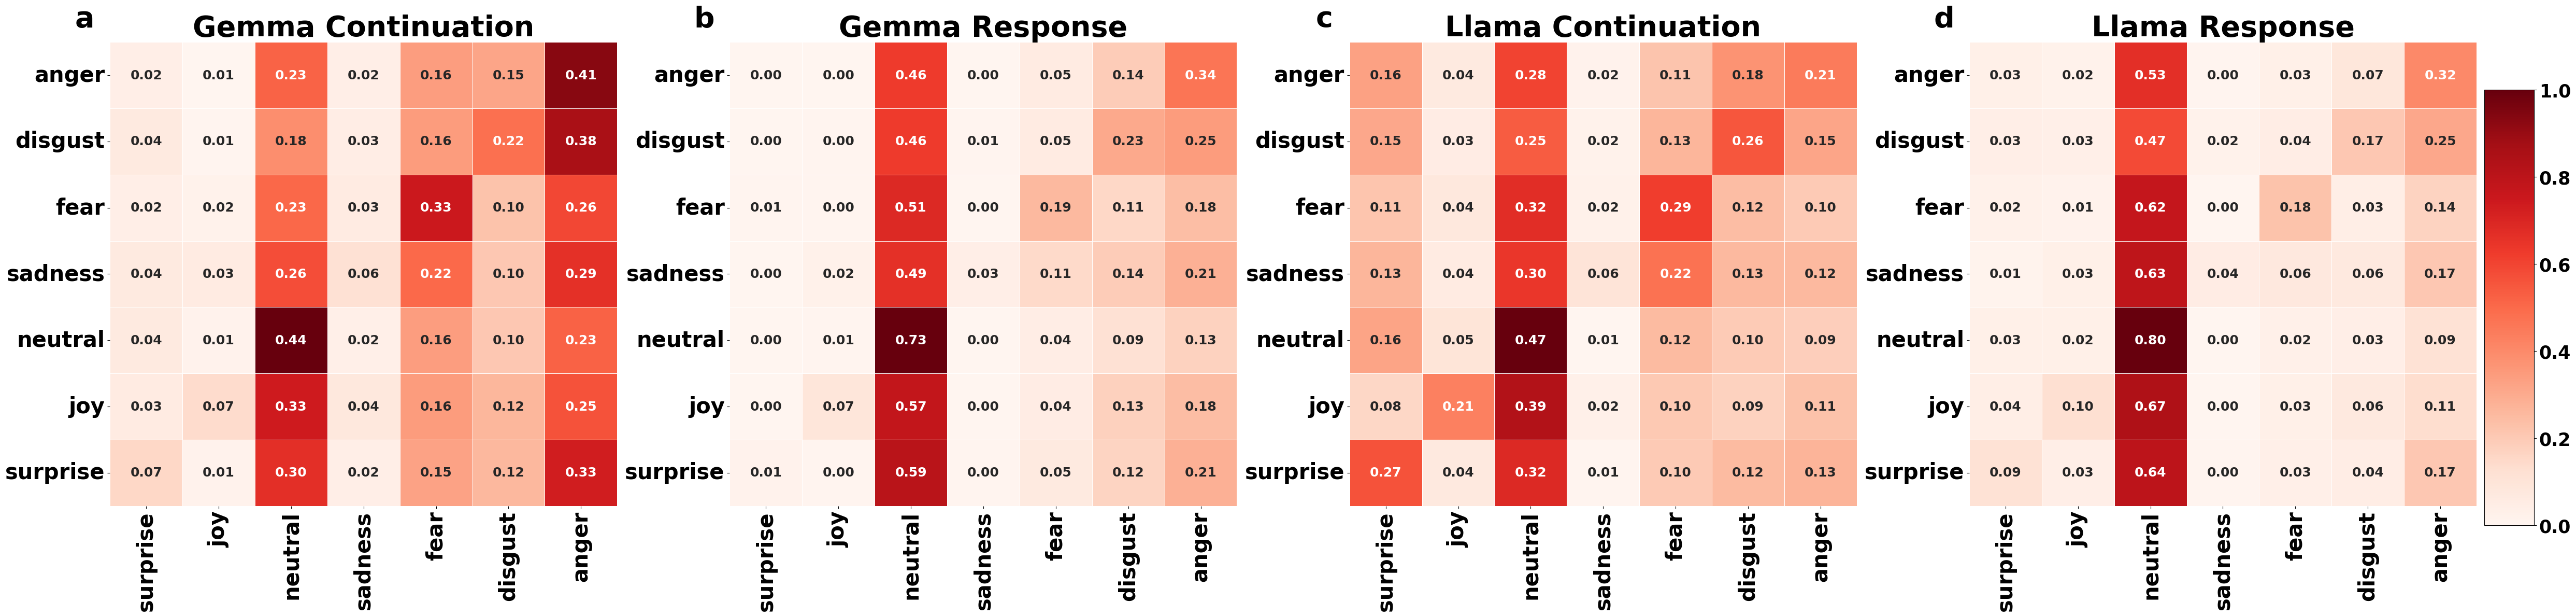

In [29]:
import numpy as np
df = Twitter # adjust the variant
# subplot
columns = ["gemma2expand[senti_label][roberta]", "gemma2response[senti_label][roberta]", "llama3expand[senti_label][roberta]", "llama3response[senti_label][roberta]"]
titles = ["Gemma Continuation", "Gemma Response", "Llama Continuation", "Llama Response"]
vmin, vmax = 0, 1
sub_labels = ['a', 'b', 'c', 'd'] 
fig, axes = plt.subplots(1, 4, figsize=(48, 12))
axes = axes.flatten()

for i, col in enumerate(columns):
    transition_matrix = pd.crosstab(
        df["text_senti_label[roberta]"], 
        df[col],
        rownames=["Original"],
        colnames=[col]
    )
    transition_matrix_normalized = transition_matrix.div(transition_matrix.sum(axis=1), axis=0)
    emotions_order = ['anger', 'disgust', 'fear', 'sadness', 'neutral', 'joy', 'surprise']
    transition_matrix_normalized_2 = transition_matrix_normalized.reindex(index=emotions_order)
    change_column = ['surprise', 'joy','neutral','sadness','fear','disgust','anger']
    transition_matrix_normalized_2 = transition_matrix_normalized_2.reindex(columns = change_column)
    
    sns.heatmap(
        transition_matrix_normalized_2, 
        annot=True, 
        fmt=".2f", 
        cmap="Reds", 
        cbar=False,
        ax=axes[i], 
        linewidths=0.5,
        annot_kws={"size": 18, "weight": "bold"}
    )

    #axes[i].set_title(f"{titles[i]} Transition")
    axes[i].set_xticklabels(axes[i].get_xticklabels(), fontsize=30, fontweight="bold", rotation = 90) 
    axes[i].set_yticklabels(axes[i].get_yticklabels(), fontsize=30, fontweight="bold", rotation = 0)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")
    axes[i].set_title(f"{titles[i]}", fontsize=40,fontweight='bold')
    
    axes[i].annotate(
        sub_labels[i], 
        xy=(-0.05, 1.05), 
        xycoords='axes fraction', 
        fontsize=40, 
        fontweight='bold', 
        ha='center', 
        va='center'
    )
cbar_ax = fig.add_axes([1, 0.15, 0.02, 0.7]) 
norm = plt.Normalize(vmin=vmin, vmax=vmax)
sm = plt.cm.ScalarMappable(cmap="Reds", norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, cax=cbar_ax)
cbar.ax.tick_params(labelsize=25)
for label in cbar.ax.get_yticklabels():
    label.set_fontweight('bold')


plt.tight_layout()
plt.savefig("pic/heatmap[Twitter][2models]_normalized[roberta].png", dpi = 300, bbox_inches='tight')
plt.savefig("pic/heatmap[Twitter][2models]_normalized[roberta].pdf", dpi = 300, bbox_inches='tight')
plt.show()


/tmp/ipykernel_244153/1342862340.py:114: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


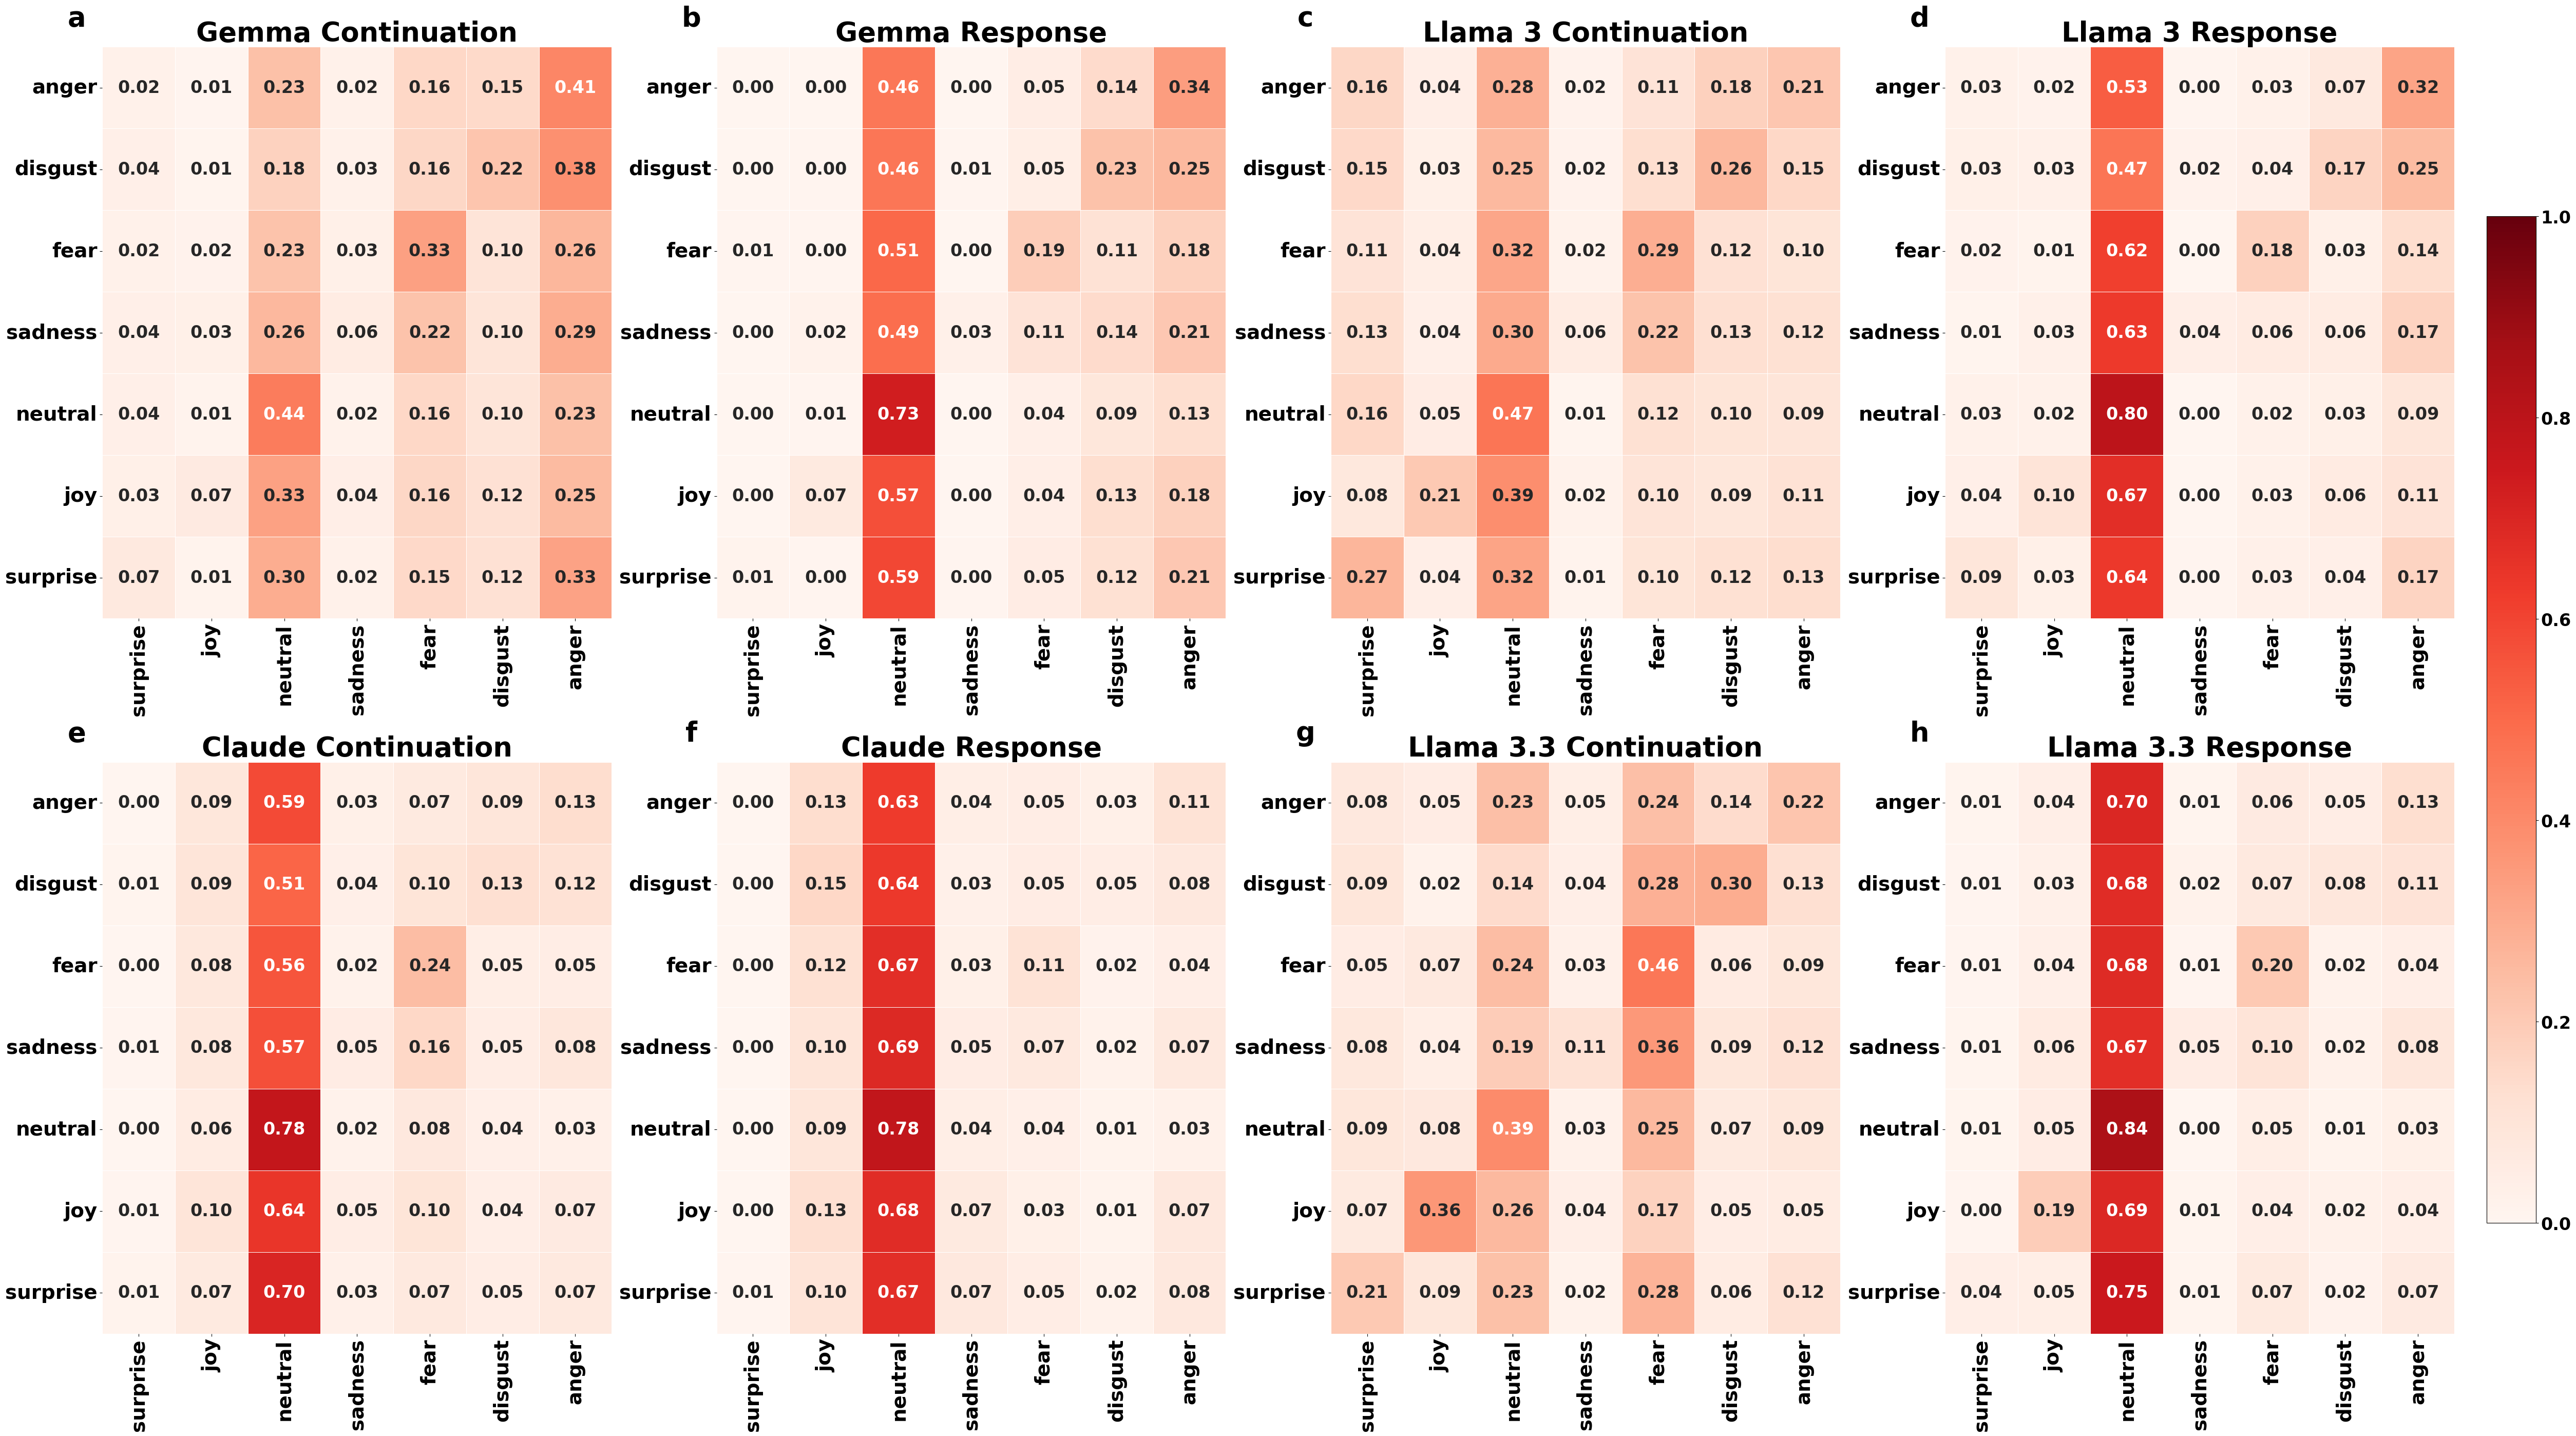

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ---- 全局设置 ----
columns = [
    "gemma2expand[senti_label][roberta]",
    "gemma2response[senti_label][roberta]",
    "llama3expand[senti_label][roberta]",
    "llama3response[senti_label][roberta]",
    "claude_expand[senti_label][roberta]",
    "claude_response[senti_label][roberta]",
    "3.3_70bexpand[senti_label][roberta]",  # Reddit2 中的
    "3.3_70bresponse[senti_label][roberta]"
    
]

titles = [
    "Gemma Continuation", "Gemma Response",
    "Llama 3 Continuation", "Llama 3 Response",
    "Claude Continuation", "Claude Response",
    "Llama 3.3 Continuation", "Llama 3.3 Response"
]

sub_labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h']
vmin = 0
vmax = 1

# 情绪顺序设定
row_order = ['anger', 'disgust', 'fear', 'sadness', 'neutral', 'joy', 'surprise']
col_order = list(reversed(row_order))  # ['surprise', ..., 'anger']

# 字体设定
annot_fontsize = 24
tick_fontsize = 28
title_fontsize = 38
label_fontsize = 38

# ---- 绘图 ----
fig, axes = plt.subplots(2, 4, figsize=(48, 28))
axes = axes.flatten()

for i, col in enumerate(columns):
    # 判断 DataFrame 来源
    if col == "3.3_70bexpand[senti_label][roberta]":
        df = Twitter2
        origin_col = "text_senti_label[roberta]" 
    else:
        df = Twitter1
        origin_col = "text_senti_label[roberta]"

    # 构建交叉表
    transition_matrix = pd.crosstab(
        df[origin_col],
        df[col],
        rownames=["Original"],
        colnames=[col]
    )

    # 行归一化
    transition_matrix_normalized = transition_matrix.div(transition_matrix.sum(axis=1), axis=0)

    # 重新排序行列 + 填充缺失值为 0
    matrix_plot = transition_matrix_normalized.reindex(index=row_order, columns=col_order).fillna(0)

    # 热力图绘制
    sns.heatmap(
        matrix_plot,
        annot=True,
        fmt=".2f",
        cmap="Reds",
        cbar=False,
        ax=axes[i],
        linewidths=0.5,
        annot_kws={"size": annot_fontsize, "weight": "bold"},
        vmin=vmin,
        vmax=vmax
    )

    axes[i].set_xticklabels(axes[i].get_xticklabels(), fontsize=tick_fontsize, fontweight='bold', rotation=90)
    axes[i].set_yticklabels(axes[i].get_yticklabels(), fontsize=tick_fontsize, fontweight='bold', rotation=0)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")
    axes[i].set_title(f"{titles[i]}", fontweight='bold', fontsize=title_fontsize)

    # 添加子图标签
    axes[i].annotate(
        sub_labels[i],
        xy=(-0.05, 1.05),
        xycoords='axes fraction',
        fontsize=label_fontsize,
        fontweight='bold',
        ha='center',
        va='center'
    )

# ---- 统一 colorbar ----
cbar_ax = fig.add_axes([1.01, 0.15, 0.02, 0.7])
norm = plt.Normalize(vmin=vmin, vmax=vmax)
sm = plt.cm.ScalarMappable(cmap="Reds", norm=norm)
sm.set_array([])

cbar = fig.colorbar(sm, cax=cbar_ax)
cbar.ax.tick_params(labelsize=24)
for label in cbar.ax.get_yticklabels():
    label.set_fontweight('bold')

plt.tight_layout()
plt.savefig("pic/heatmap[Twitter][4models]_normalized[roberta].png", dpi = 300, bbox_inches='tight')
#plt.savefig("pic/heatmap[Reddit][4models]_normalized[roberta].pdf", dpi = 300, bbox_inches='tight' )
plt.show()

/tmp/ipykernel_349104/899391574.py:105: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


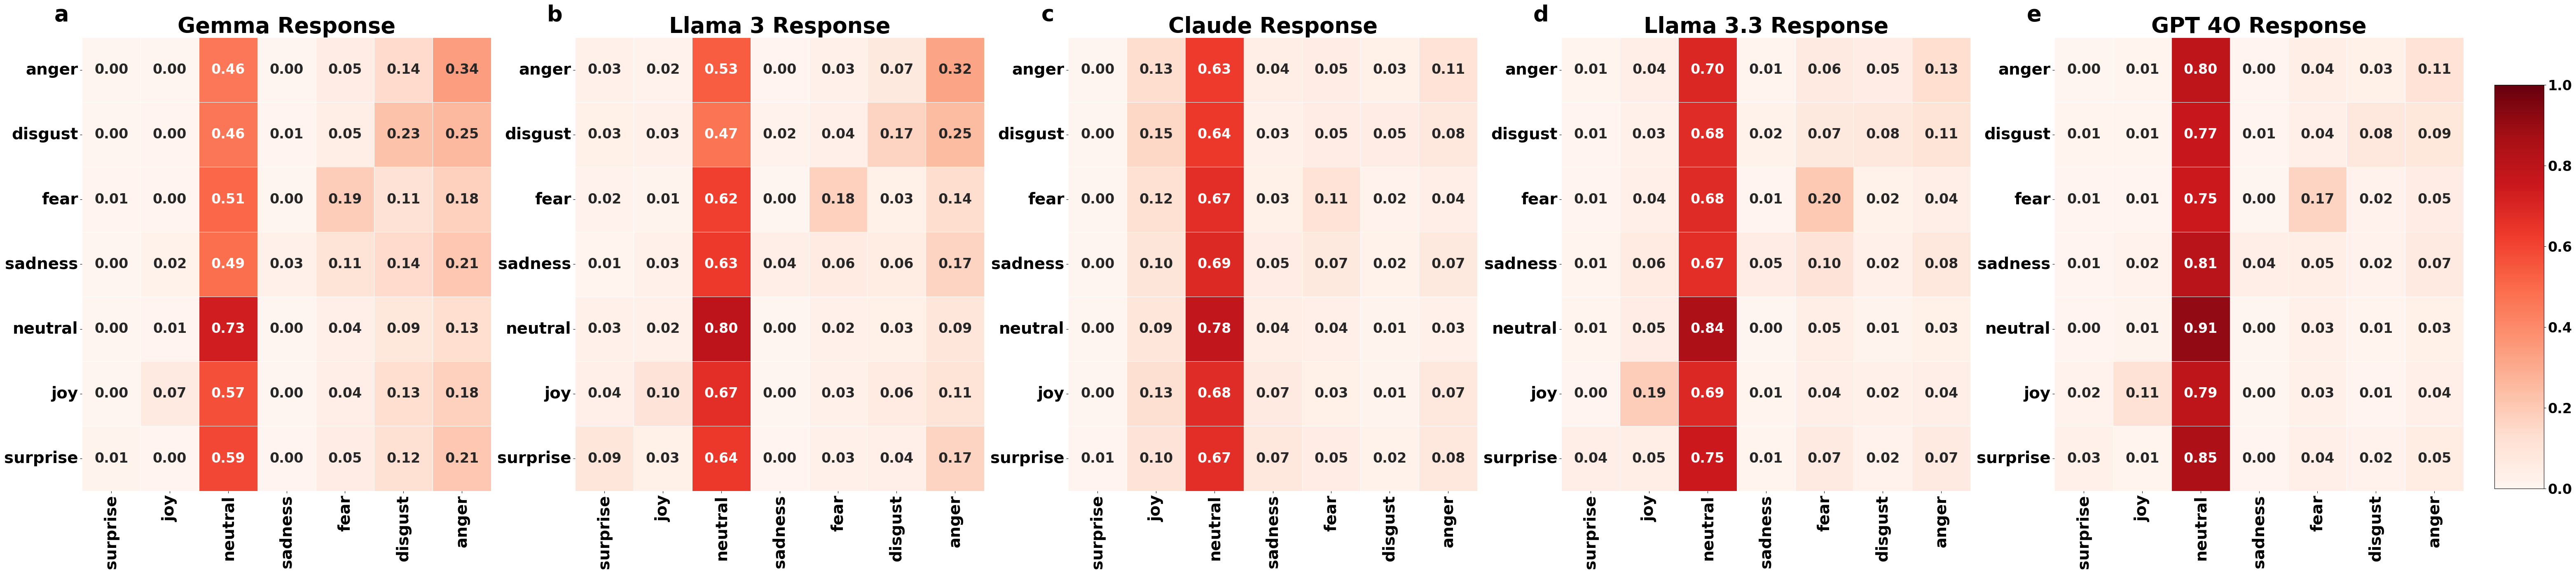

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ---- 全局设置 ----
columns = [
    "gemma2response[senti_label][roberta]",
    "llama3response[senti_label][roberta]",
    "claude_response[senti_label][roberta]",
    "3.3_70bresponse[senti_label][roberta]",
    "4o_response[senti_label][roberta]"
]

titles = ["Gemma Response", "Llama 3 Response", "Claude Response", "Llama 3.3 Response", "GPT 4O Response"]

sub_labels = ['a', 'b', 'c', 'd','e']# 'f', 'g', 'h']
vmin = 0
vmax = 1

# 情绪顺序设定
row_order = ['anger', 'disgust', 'fear', 'sadness', 'neutral', 'joy', 'surprise']
col_order = list(reversed(row_order))  # ['surprise', ..., 'anger']

# 字体设定
annot_fontsize = 24
tick_fontsize = 28
title_fontsize = 38
label_fontsize = 38

# ---- 绘图 ----
fig, axes = plt.subplots(1, 5, figsize=(60, 14))
axes = axes.flatten()

for i, col in enumerate(columns):
    # 判断 DataFrame 来源
    if col == "3.3_70bexpand[senti_label][roberta]":
        df = Twitter
        origin_col = "text_senti_label[roberta]" 
    else:
        df = Twitter
        origin_col = "text_senti_label[roberta]"

    # 构建交叉表
    transition_matrix = pd.crosstab(
        df[origin_col],
        df[col],
        rownames=["Original"],
        colnames=[col]
    )

    # 行归一化
    transition_matrix_normalized = transition_matrix.div(transition_matrix.sum(axis=1), axis=0)

    # 重新排序行列 + 填充缺失值为 0
    matrix_plot = transition_matrix_normalized.reindex(index=row_order, columns=col_order).fillna(0)

    # 热力图绘制
    sns.heatmap(
        matrix_plot,
        annot=True,
        fmt=".2f",
        cmap="Reds",
        cbar=False,
        ax=axes[i],
        linewidths=0.5,
        annot_kws={"size": annot_fontsize, "weight": "bold"},
        vmin=vmin,
        vmax=vmax
    )

    axes[i].set_xticklabels(axes[i].get_xticklabels(), fontsize=tick_fontsize, fontweight='bold', rotation=90)
    axes[i].set_yticklabels(axes[i].get_yticklabels(), fontsize=tick_fontsize, fontweight='bold', rotation=0)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")
    axes[i].set_title(f"{titles[i]}", fontweight='bold', fontsize=title_fontsize)

    # 添加子图标签
    axes[i].annotate(
        sub_labels[i],
        xy=(-0.05, 1.05),
        xycoords='axes fraction',
        fontsize=label_fontsize,
        fontweight='bold',
        ha='center',
        va='center'
    )

# ---- 统一 colorbar ----
cbar_ax = fig.add_axes([1.01, 0.15, 0.02, 0.7])
norm = plt.Normalize(vmin=vmin, vmax=vmax)
sm = plt.cm.ScalarMappable(cmap="Reds", norm=norm)
sm.set_array([])

cbar = fig.colorbar(sm, cax=cbar_ax)
cbar.ax.tick_params(labelsize=24)
for label in cbar.ax.get_yticklabels():
    label.set_fontweight('bold')

plt.tight_layout()
plt.savefig("pic/heatmap[Twitter][5models][response]_normalized[roberta].png", dpi = 300, bbox_inches='tight')
plt.savefig("pic/heatmap[Twitter][5models][response]_normalized[roberta].pdf", dpi = 300, bbox_inches='tight' )
plt.show()

/tmp/ipykernel_3259153/2094356781.py:92: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


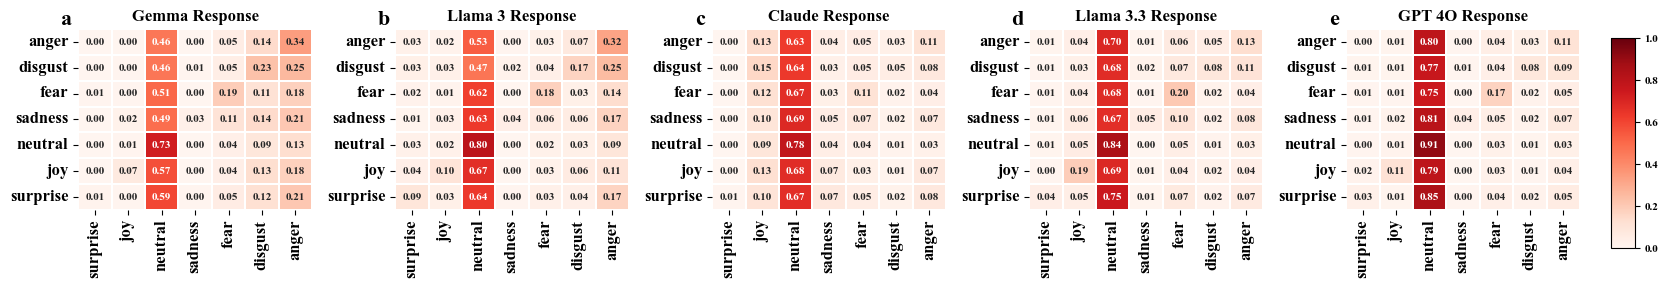

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib import font_manager

# ---- 字体设置 ----
font_path_bold = "/usr/share/fonts/truetype/msttcorefonts/Times_New_Roman_Bold.ttf"
font_prop_bold = font_manager.FontProperties(fname=font_path_bold, size=8)

# ---- 全局设置 ----
columns = [
    "gemma2response[senti_label][roberta]",
    "llama3response[senti_label][roberta]",
    "claude_response[senti_label][roberta]",
    "3.3_70bresponse[senti_label][roberta]",
    "4o_response[senti_label][roberta]"
]

annot_fontsize = 8
tick_fontsize = 12
title_fontsize = 12
label_fontsize = 14

titles = ["Gemma Response", "Llama 3 Response", "Claude Response", "Llama 3.3 Response", "GPT 4O Response"]
sub_labels = ['a', 'b', 'c', 'd', 'e']
vmin = 0
vmax = 1

row_order = ['anger', 'disgust', 'fear', 'sadness', 'neutral', 'joy', 'surprise']
col_order = list(reversed(row_order))

# ---- 绘图 ----
fig, axes = plt.subplots(1, 5, figsize=(16, 3))  # 适配8pt字体尺寸
axes = axes.flatten()

for i, col in enumerate(columns):
    df = Twitter
    origin_col = "text_senti_label[roberta]"

    transition_matrix = pd.crosstab(
        df[origin_col],
        df[col],
        rownames=["Original"],
        colnames=[col]
    )

    transition_matrix_normalized = transition_matrix.div(transition_matrix.sum(axis=1), axis=0)
    matrix_plot = transition_matrix_normalized.reindex(index=row_order, columns=col_order).fillna(0)

    sns.heatmap(
        matrix_plot,
        annot=True,
        fmt=".2f",
        cmap="Reds",
        cbar=False,
        ax=axes[i],
        linewidths=0.3,
        annot_kws={"size": 8, "fontproperties": font_prop_bold},
        vmin=vmin,
        vmax=vmax
    )

    axes[i].set_xticklabels(axes[i].get_xticklabels(), fontproperties=font_prop_bold, fontsize=title_fontsize, rotation=90)
    axes[i].set_yticklabels(axes[i].get_yticklabels(), fontproperties=font_prop_bold, fontsize=title_fontsize, rotation=0)
    axes[i].set_xlabel("", fontproperties=font_prop_bold, )
    axes[i].set_ylabel("", fontproperties=font_prop_bold,)
    axes[i].set_title(titles[i], fontproperties=font_prop_bold, fontsize=title_fontsize, fontweight='bold')

    # 子图标签
    axes[i].annotate(
        sub_labels[i],
        xy=(-0.05, 1.05),
        xycoords='axes fraction',
        fontsize=16,
        fontproperties=font_prop_bold,
        ha='center',
        va='center'
    )

# ---- colorbar ----
cbar_ax = fig.add_axes([1.01, 0.15, 0.015, 0.7])
norm = plt.Normalize(vmin=vmin, vmax=vmax)
sm = plt.cm.ScalarMappable(cmap="Reds", norm=norm)
sm.set_array([])

cbar = fig.colorbar(sm, cax=cbar_ax)
cbar.ax.tick_params(labelsize=12)
for label in cbar.ax.get_yticklabels():
    label.set_fontproperties(font_prop_bold)

plt.tight_layout()
plt.savefig("pic/heatmap[Twitter][5models][response]_IEEE_bold.png", dpi=300, bbox_inches='tight')
plt.savefig("pic/heatmap[Twitter][5models][response]_IEEE_bold.pdf", dpi=300, bbox_inches='tight')
plt.show()


In [23]:
1

1

#### *Horizontal lines*

In [41]:
value = df['orginal_label'].value_counts()
value

orginal_label
anticipation    6849
joy             3694
disgust         1130
anger            432
sadness           64
fear              28
optimism           3
Name: count, dtype: int64

In [39]:
treemap_data = df.groupby(['[llama3]expand_label', 'orginal_label']).size().reset_index(name='count')
group_totals = treemap_data.groupby('[llama3]expand_label')['count'].transform('sum')
treemap_data['percent'] = treemap_data['count'] / group_totals

pos = ['anticipation ','joy', 'love', 'optimism','surprise', 'trust']
neg = ['anger', 'disgust', 'fear', 'pessimism', 'sadness']
treemap_data['sentiment source'] = treemap_data['orginal_label'].apply(lambda x: 'negative' if x in neg else 'positive')  

In [40]:
treemap_data   

[llama3]expand_label orginal_label  count   percent sentiment source
0                 anger         anger    181  0.038453         negative
1                 anger  anticipation   2607  0.553856         positive
2                 anger       disgust    497  0.105587         negative
3                 anger          fear     11  0.002337         negative
4                 anger           joy   1390  0.295305         positive
5                 anger      optimism      2  0.000425         positive
6                 anger       sadness     19  0.004037         negative
7          anticipation         anger     56  0.021613         negative
8          anticipation  anticipation   1574  0.607487         positive
9          anticipation       disgust    197  0.076032         negative
10         anticipation          fear      3  0.001158         negative
11         anticipation           joy    751  0.289849         positive
12         anticipation      optimism      1  0.000386         positive
13         anticipation       sadness      9  0.003474         negative
14              disgust         anger     59  0.045986         negative
15              disgust  anticipation    703  0.547935         positive
16              disgust       disgust    125  0.097428         negative
17              disgust          fear      7  0.005456         negative
18              disgust           joy    383  0.298519         positive
19              disgust       sadness      6  0.004677         negative
20                 fear         anger     34  0.036442         negative
21                 fear  anticipation    496  0.531618         positive
22                 fear       disgust     86  0.092176         negative
23                 fear          fear      1  0.001072         negative
24                 fear           joy    307  0.329046         positive
25                 fear       sadness      9  0.009646         negative
26                  joy         anger     22  0.032544         negative
27                  joy  anticipation    370  0.547337         positive
28                  joy       disgust     55  0.081361         negative
29                  joy          fear      1  0.001479         negative
30                  joy           joy    220  0.325444         positive
31                  joy       sadness      8  0.011834         negative
32             optimism         anger     60  0.037951         negative
33             optimism  anticipation    866  0.547755         positive
34             optimism       disgust    137  0.086654         negative
35             optimism          fear      3  0.001898         negative
36             optimism           joy    506  0.320051         positive
37             optimism       sadness      9  0.005693         negative
38            pessimism  anticipation      1  1.000000         positive
39              sadness         anger     19  0.050000         negative
40              sadness  anticipation    203  0.534211         positive
41              sadness       disgust     26  0.068421         negative
42              sadness          fear      2  0.005263         negative
43              sadness           joy    126  0.331579         positive
44              sadness       sadness      4  0.010526         negative
45             surprise         anger      1  0.020833         negative
46             surprise  anticipation     29  0.604167         positive
47             surprise       disgust      7  0.145833         negative
48             surprise           joy     11  0.229167         positive

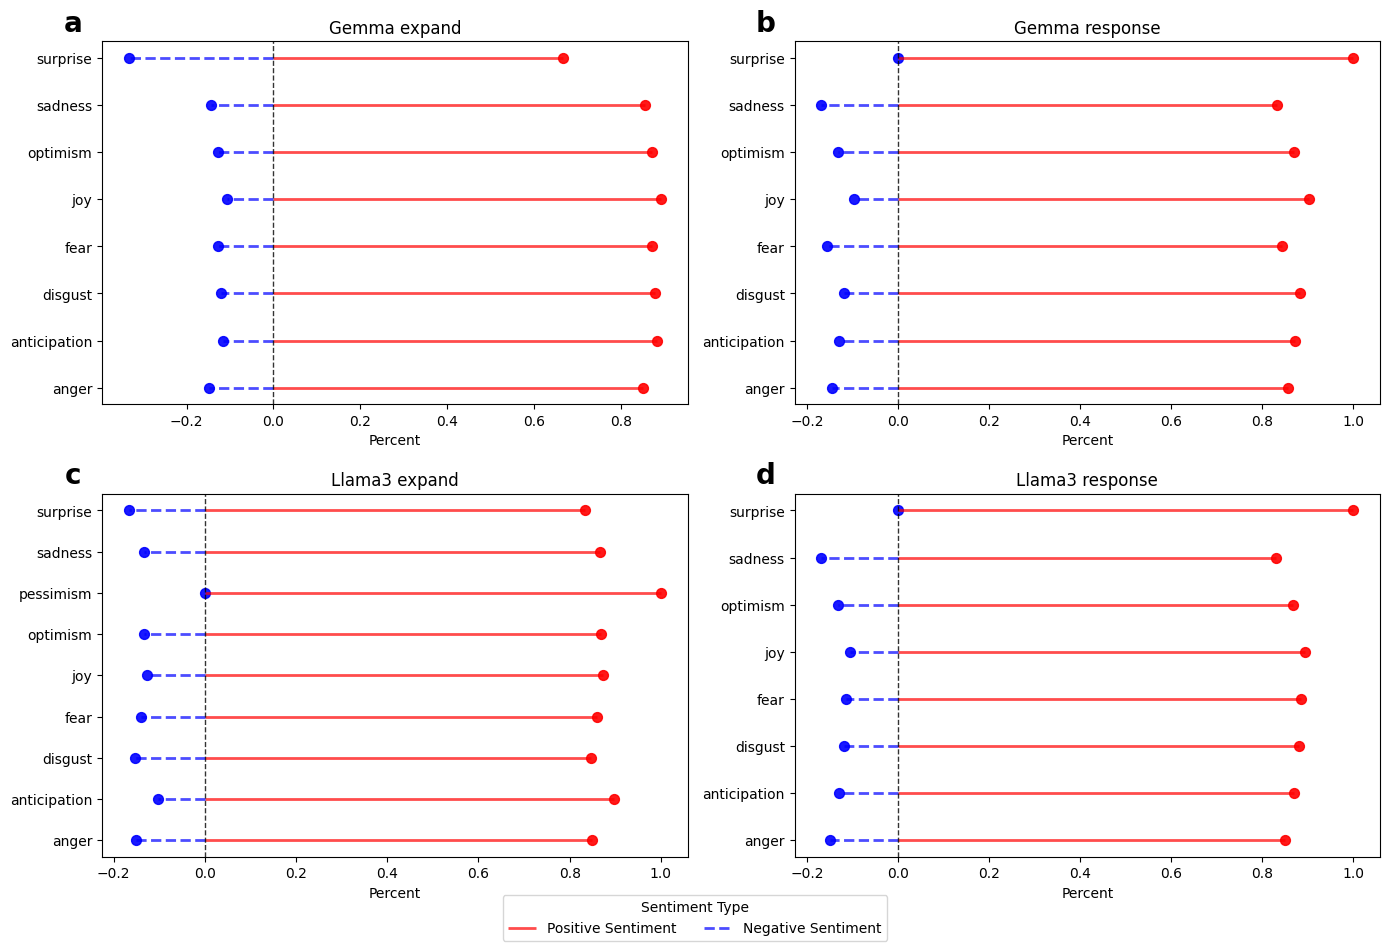

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
pos = ['anticipation', 'joy', 'love', 'optimism', 'surprise', 'trust']
neg = ['anger', 'disgust', 'fear', 'pessimism', 'sadness']

def process_and_plot(model_label, title, ax):
    """处理数据并绘制单个子图"""
    treemap_data = df.groupby([model_label, 'orginal_label']).size().reset_index(name='count')
    group_totals = treemap_data.groupby(model_label)['count'].transform('sum')
    treemap_data['percent'] = treemap_data['count'] / group_totals
    treemap_data['sentiment source'] = treemap_data['orginal_label'].apply(
        lambda x: 'negative' if x in neg else 'positive'
    )
    treemap_data['percent_adjusted'] = treemap_data.apply(
        lambda row: row['percent'] if row['sentiment source'] == 'positive' else -row['percent'], axis=1
    )

    summary = treemap_data.groupby([model_label, 'sentiment source'])['percent_adjusted'].sum().reset_index()
    plot_data = summary.pivot(index=model_label, columns='sentiment source', values='percent_adjusted').fillna(0)

    expand_labels = plot_data.index.tolist()  # 类别名称
    x_positive = plot_data['positive'].values if 'positive' in plot_data.columns else [0] * len(expand_labels)
    x_negative = plot_data['negative'].values if 'negative' in plot_data.columns else [0] * len(expand_labels)
    y = range(len(expand_labels))  # y 轴位置

    ax.hlines(y, 0, x_positive, colors='red', linestyles='-', linewidth=2, alpha=0.7, label='Positive Sentiment')
    ax.hlines(y, 0, x_negative, colors='blue', linestyles='--', linewidth=2, alpha=0.7, label='Negative Sentiment')
    ax.scatter(x_positive, y, color='red', s=50, alpha=0.9)
    ax.scatter(x_negative, y, color='blue', s=50, alpha=0.9)


    ax.set_yticks(y)
    ax.set_yticklabels(expand_labels, fontsize=10)
    ax.set_xlabel('Percent', fontsize=10)
    ax.set_title(title, fontsize=12)
    ax.axvline(0, color='black', linewidth=1, linestyle='--', alpha=0.8)
    ax.grid(False)

fig, axs = plt.subplots(2, 2, figsize=(14, 10))
#fig.suptitle("Sentiment Distribution Across Models", fontsize=16)

# 绘制每个子图
process_and_plot('[gemma]expand_label', 'Gemma expand', axs[0, 0])
process_and_plot('[gemma]response_label', 'Gemma response', axs[0, 1])
process_and_plot('[llama3]expand_label', 'Llama3 expand', axs[1, 0])
process_and_plot('[llama3]response_label', 'Llama3 response', axs[1, 1])

# 设置子图标注
sub_labels = ['a', 'b', 'c', 'd']  # 子图标注
for ax, label in zip(axs.flat, sub_labels):
    ax.annotate(label, xy=(-0.05, 1.05), xycoords='axes fraction', fontsize=20, fontweight='bold', ha='center', va='center')

# 图例与布局调整
handles, labels = axs[0, 0].get_legend_handles_labels()
fig.legend(handles, labels, title='Sentiment Type', loc='lower center', ncol=2)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig("new_pic/sentiment_sources[Twitter][2models]_normalized.png", dpi = 300)
plt.show()


## 2.定量分析

### 显著性差异检验

In [80]:
sentiment = ['anticipation', 'joy', 'disgust', 'anger','sadness','fear','optimism']
for i in sentiment:
      orginal_senti = Twitter[Twitter['orginal_label'] == i]
      model_senti =  Twitter[Twitter['[llama3]response_label'] == i]
      a = orginal_senti['orginal_score'].to_list()
      b = model_senti['[llama3]response_score'].to_list()
      print(f"原文与llama回复内容情绪值 ({i}):")
      Mann_Whitney_U_test(a,b)

原文与llama回复内容情绪值 (anticipation):
U统计量: 105169.0, P值: 0.0, 前者整体显著比后者小。
原文与llama回复内容情绪值 (joy):
U统计量: 136265.0, P值: 2.5189308976322035e-188, 前者整体显著比后者小。
原文与llama回复内容情绪值 (disgust):
U统计量: 544851.0, P值: 0.00016044515441640374, 前者整体显著比后者大。
原文与llama回复内容情绪值 (anger):
U统计量: 624239.0, P值: 5.506996092839165e-26, 前者整体显著比后者小。
原文与llama回复内容情绪值 (sadness):
U统计量: 696.0, P值: 2.1699189822870342e-18, 前者整体显著比后者小。
原文与llama回复内容情绪值 (fear):
U统计量: 2788.0, P值: 0.00029785595041563045, 前者整体显著比后者小。
原文与llama回复内容情绪值 (optimism):
U统计量: 43.0, P值: 0.001998228693691099, 前者整体显著比后者小。


In [ ]:
sentiment = ['anticipation', 'joy', 'disgust', 'anger','sadness','fear','optimism']
for i in sentiment:
      orginal_senti = Twitter[Twitter['orginal_label'] == i]
      model_senti =  Twitter[Twitter['[llama3]expand_label'] == i]
      a = orginal_senti['orginal_score'].to_list()
      b = model_senti['[llama3]expand_score'].to_list()
      print(f"原文与llama续写内容情绪值 ({i}):")
      Mann_Whitney_U_test(a,b)

原文与llama续写内容情绪值 (anticipation):
U统计量: 1162311.0, P值: 6.27046231138758e-41, 前者整体显著比后者小。
原文与llama续写内容情绪值 (joy):
U统计量: 54173.5, P值: 0.20537252131781747, 两组数据之间没有显著差异。
原文与llama续写内容情绪值 (disgust):
U统计量: 882234.0, P值: 1.6106126746728698e-09, 前者整体显著比后者小。
原文与llama续写内容情绪值 (anger):
U统计量: 9570203.0, P值: 0.004784738257966316, 前者整体显著比后者大。
原文与llama续写内容情绪值 (sadness):
U统计量: 100821.0, P值: 6.602836137328462e-09, 前者整体显著比后者小。
原文与llama续写内容情绪值 (fear):
U统计量: 214441.0, P值: 0.0012166778058640747, 前者整体显著比后者小。


In [81]:
sentiment = ['anticipation', 'joy', 'disgust', 'anger','sadness','fear','optimism']
for i in sentiment:
      orginal_senti = Twitter[Twitter['orginal_label'] == i]
      model_senti =  Twitter[Twitter['[gemma]expand_label'] == i]
      a = orginal_senti['orginal_score'].to_list()
      b = model_senti['[gemma]expand_score'].to_list()
      print(f"原文与gemma续写内容情绪值 ({i}):")
      Mann_Whitney_U_test(a,b)

KeyError: '[gemma]expand_label'

In [82]:
sentiment = ['anticipation', 'joy', 'disgust', 'anger','sadness','fear','optimism']
for i in sentiment:
      orginal_senti = Twitter[Twitter['orginal_label'] == i]
      model_senti =  Twitter[Twitter['[gemma]response_label'] == i]
      a = orginal_senti['orginal_score'].to_list()
      b = model_senti['[gemma]response_score'].to_list()
      print(f"原文与gemma回复内容情绪值 ({i}):")
      Mann_Whitney_U_test(a,b)

原文与gemma回复内容情绪值 (anticipation):
U统计量: 59508.0, P值: 0.0, 前者整体显著比后者小。
原文与gemma回复内容情绪值 (joy):
U统计量: 63718.0, P值: 7.317628017661919e-97, 前者整体显著比后者小。
原文与gemma回复内容情绪值 (disgust):
U统计量: 472704.0, P值: 0.11598321238610114, 两组数据之间没有显著差异。
原文与gemma回复内容情绪值 (anger):
U统计量: 612531.5, P值: 1.6108319951104946e-53, 前者整体显著比后者小。
原文与gemma回复内容情绪值 (sadness):
U统计量: 657.0, P值: 2.931711305808536e-17, 前者整体显著比后者小。
原文与gemma回复内容情绪值 (fear):
U统计量: 3099.0, P值: 2.7762292844618813e-06, 前者整体显著比后者小。
原文与gemma回复内容情绪值 (optimism):
U统计量: 53.0, P值: 0.0017221750347240807, 前者整体显著比后者小。


In [83]:
# 尝试waterfall plot
all_labels = set(orginallable_count.index) | set(gemma_expand_count.index) | set(gemma_response_count.index)
original_counts = orginallable_count.reindex(all_labels, fill_value=0)
expand_counts = gemma_expand_count.reindex(all_labels, fill_value=0)
response_counts = gemma_response_count.reindex(all_labels, fill_value=0)

# 计算数量变化
expand_change = expand_counts - original_counts
response_change = response_counts - original_counts

# 输出结果
result = pd.DataFrame({
    'Original': original_counts,
    'Gemma Expand': expand_counts,
    'Expand Change': expand_change,
    'Gemma Response': response_counts,
    'Response Change': response_change
})

In [84]:
result

Original  Gemma Expand  Expand Change  Gemma Response  \
surprise             0             8              8               1   
sadness             64           547            483              95   
anticipation      6849          1091          -5758            4023   
pessimism            0             1              1               0   
joy               3694           206          -3488             217   
disgust           1130           881           -249             803   
fear                28          1429           1401             453   
anger              432          4888           4456            5103   
optimism             3          1849           1846            1505   

              Response Change  
surprise                    1  
sadness                    31  
anticipation            -2826  
pessimism                   0  
joy                     -3477  
disgust                  -327  
fear                      425  
anger                    4671  
optimism                 1502

### ANOVA Test

In [26]:
Twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12200 entries, 0 to 12199
Data columns (total 48 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Unnamed: 0.1                           12200 non-null  int64  
 1   author.username                        12200 non-null  object 
 2   Unnamed: 0                             12200 non-null  int64  
 3   id                                     12200 non-null  int64  
 4   conversation_id                        12200 non-null  float64
 5   referenced_tweets.replied_to.id        9831 non-null   float64
 6   author_id                              12200 non-null  int64  
 7   in_reply_to_user_id                    9831 non-null   float64
 8   in_reply_to_username                   3473 non-null   object 
 9   text                                   12200 non-null  object 
 10  text length                            12200 non-null  int64  
 11  da

In [27]:
import scipy.stats as stats
import numpy as np

# 所有结果列的情绪标签集合
results_list = [
    Twitter['text_senti_label[roberta]'],  
    Twitter['gemma2response[senti_label][roberta]'],
    Twitter['llama3response[senti_label][roberta]'],
    Twitter['claude_response[senti_label][roberta]'],
    Twitter['3.3_70bresponse[senti_label][roberta]'],
    Twitter['4o_response[senti_label][roberta]'].dropna()  #去除空值
]

results_union = set().union(*results_list)
sentiment = [s for s in results_union if isinstance(s, str) and s.strip() != ""]

for i in sentiment:
    # 各模型对应的情绪得分列表（若没数据则跳过）
    a = Twitter[Twitter['text_senti_label[roberta]'] == i]['text_senti_score[roberta]'].dropna().tolist()
    b = Twitter[Twitter['llama3response[senti_label][roberta]'] == i]['llama3response[senti_score][roberta]'].dropna().tolist()
    c = Twitter[Twitter['gemma2response[senti_label][roberta]'] == i]['gemma2response[senti_score][roberta]'].dropna().tolist()
    d = Twitter[Twitter['3.3_70bresponse[senti_label][roberta]'] == i]['3.3_70bresponse[senti_score][roberta]'].dropna().tolist()
    e = Twitter[Twitter['4o_response[senti_label][roberta]'] == 1]['4o_response[senti_score][roberta]'].dropna().tolist()

    # 收集非空列表
    score_lists = [lst for lst in [a, b, c, d, e] if len(lst) > 1]

    if len(score_lists) < 2:
        print(f"跳过情绪 '{i}'（有效样本数不足以做ANOVA）\n")
        continue

    # 方差分析
    anova_result = stats.f_oneway(*score_lists)

    print(f"ANOVA results for sentiment '{i}':")
    print(f"F-statistic: {anova_result.statistic:.4f}, p-value: {anova_result.pvalue:.4e}")
    
    if anova_result.pvalue < 0.05:
        print(f"✅ 存在显著差异（p < 0.05）\n")
    else:
        print(f"❌ 无显著差异（p >= 0.05）\n")


ANOVA results for sentiment 'disgust':
F-statistic: 31.1522, p-value: 8.1891e-20
✅ 存在显著差异（p < 0.05）

ANOVA results for sentiment 'fear':
F-statistic: 21.8768, p-value: 4.9317e-14
✅ 存在显著差异（p < 0.05）

ANOVA results for sentiment 'anger':
F-statistic: 170.0542, p-value: 2.3226e-106
✅ 存在显著差异（p < 0.05）

ANOVA results for sentiment 'surprise':
F-statistic: 61.9039, p-value: 8.7274e-38
✅ 存在显著差异（p < 0.05）

ANOVA results for sentiment 'joy':
F-statistic: 55.1242, p-value: 2.0432e-33
✅ 存在显著差异（p < 0.05）

ANOVA results for sentiment 'neutral':
F-statistic: 744.5498, p-value: 0.0000e+00
✅ 存在显著差异（p < 0.05）

ANOVA results for sentiment 'sadness':
F-statistic: 3.2915, p-value: 2.0097e-02
✅ 存在显著差异（p < 0.05）



In [19]:
sentiment

['joy', 'neutral', 'fear', 'surprise', 'sadness', 'anger', 'disgust']

In [28]:
# 情绪标签列表，例如：sentiment = ['happy', 'sad', 'angry']
sentiment = ['joy', 'neutral', 'fear', 'surprise', 'sadness', 'anger', 'disgust']

# 设定比较对：（列名, 组1, 组2）
target_pairs = [
    ("Gemma Resp vs Llama Resp", 'Gemma Response', 'Llama Response'),
    ("Gemma Resp vs Claude Resp", 'Gemma Response', 'Claude Response'),
    ("Gemma Resp vs Llama3.3 Resp", 'Gemma Response', 'Llama3.3 Response'),
    ("Gemma Resp vs Gpt4o Resp", 'Gemma Response', 'GPT 4O Response'),
    ("Llama Resp vs Claude Resp", 'Llama Response', 'Claude Response'),
    ("Llama Resp vs Llama3.3 Resp", 'Llama Response', 'Llama3.3 Response'),
    ("Llama Resp vs Gpt4o Resp", 'Llama Response', 'GPT 4O Response'),
    ("Claude Resp vs Llama3.3 Resp", 'Claude Response', 'Llama3.3 Response'),
    ("Claude Resp vs Gpt4o Resp", 'Claude Response', 'GPT 4O Response'),
    ("Llama3.3 Resp vs Gpt4o Resp", 'Llama3.3 Response', 'GPT 4O Response'),
    ("Gemma Resp vs Original", 'Gemma Response', 'Original'),
    ("Llama Resp vs Original", 'Llama Response', 'Original'),
    ("Claude Resp vs Original", 'Claude Response', 'Original'),
    ("Llama3.3 Resp vs Original", 'Llama3.3 Response', 'Original'),
    ("Gpt4o Resp vs Original", 'GPT 4O Response', 'Original'),
]



In [29]:
def get_significance_stars(p):
    if p < 0.001:
        return '***'
    elif p < 0.01:
        return '**'
    elif p < 0.05:
        return '*'
    else:
        return ''

In [30]:
import pandas as pd
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# 创建结果表格
final_table = pd.DataFrame(columns=["Emotions"] + [name for name, _, _ in target_pairs])

for i in sentiment:
    # 获取每组数据
    groups = {
        'Original': Twitter['text_senti_score[roberta]'][Twitter['text_senti_label[roberta]'] == i].dropna(),
        'Llama Response': Twitter['llama3response[senti_score][roberta]'][Twitter['llama3response[senti_label][roberta]'] == i].dropna(),
        'Gemma Response': Twitter['gemma2response[senti_score][roberta]'][Twitter['gemma2response[senti_label][roberta]'] == i].dropna(),
        'Claude Response': Twitter['claude_response[senti_score][roberta]'][Twitter['claude_response[senti_label][roberta]'] == i].dropna(),
        'Llama3.3 Response': Twitter['3.3_70bresponse[senti_score][roberta]'][Twitter['3.3_70bresponse[senti_label][roberta]'] == i].dropna(),
         'GPT 4O Response': Twitter['4o_response[senti_score][roberta]'][Twitter['4o_response[senti_label][roberta]'] == i].dropna()
    }

    # 过滤样本数不足的
    filtered_groups = {k: v for k, v in groups.items() if len(v) >= 2}
    if len(filtered_groups) < 2:
        continue

    scores = pd.concat(filtered_groups.values(), ignore_index=True)
    labels = sum([[k] * len(v) for k, v in filtered_groups.items()], [])
    data = pd.DataFrame({'scores': scores, 'group': labels})

    # Tukey 检验
    tukey = pairwise_tukeyhsd(endog=data['scores'], groups=data['group'], alpha=0.05)
    summary_df = pd.DataFrame(data=tukey.summary().data[1:], columns=tukey.summary().data[0])

    # 构造当前情绪行
    row = {"Emotions": i}

    for col_name, g1, g2 in target_pairs:
        result = summary_df[((summary_df['group1'] == g1) & (summary_df['group2'] == g2)) |
                            ((summary_df['group1'] == g2) & (summary_df['group2'] == g1))]

        if not result.empty:
            r = result.iloc[0]
            p = r['p-adj']
            stars = get_significance_stars(p)

            if r['group1'] == g1 and r['group2'] == g2:
                diff = r['meandiff']
                direction = '>' if diff > 0 else '<'
            elif r['group1'] == g2 and r['group2'] == g1:
                diff = -r['meandiff']
                direction = '>' if diff > 0 else '<'
            else:
                diff = None
                direction = None

            if diff is not None and p < 0.05:
                row[col_name] = f"{direction}{abs(round(diff, 3))} (p={round(p, 4)} {stars})"
            else:
                row[col_name] = "-"
        else:
            row[col_name] = "-"

    final_table = pd.concat([final_table, pd.DataFrame([row])], ignore_index=True)

# 导出结果
final_table.to_csv("Twitter_response_results_marked.csv", index=False)


In [31]:
final_table

Emotions Gemma Resp vs Llama Resp Gemma Resp vs Claude Resp  \
0       joy       >0.106 (p=0.0 ***)                         -   
1   neutral       >0.039 (p=0.0 ***)        >0.023 (p=0.0 ***)   
2      fear                        -                         -   
3  surprise      >0.097 (p=0.0341 *)                         -   
4   sadness                        -     <0.101 (p=0.0007 ***)   
5     anger       >0.064 (p=0.0 ***)        >0.095 (p=0.0 ***)   
6   disgust                        -                         -   

  Gemma Resp vs Llama3.3 Resp Gemma Resp vs Gpt4o Resp  \
0          >0.163 (p=0.0 ***)                        -   
1          >0.058 (p=0.0 ***)       >0.072 (p=0.0 ***)   
2                           -                        -   
3                           -                        -   
4                           -                        -   
5          >0.107 (p=0.0 ***)      >0.026 (p=0.0251 *)   
6                           -                        -   

  Llama Resp vs Claude Resp Llama Resp vs Llama3.3 Resp  \
0        <0.107 (p=0.0 ***)       >0.057 (p=0.0001 ***)   
1        <0.016 (p=0.0 ***)          >0.018 (p=0.0 ***)   
2                         -                           -   
3                         -       <0.095 (p=0.0001 ***)   
4      <0.082 (p=0.0041 **)                           -   
5      >0.031 (p=0.0067 **)          >0.043 (p=0.0 ***)   
6                         -                           -   

  Llama Resp vs Gpt4o Resp Claude Resp vs Llama3.3 Resp  \
0      <0.054 (p=0.0192 *)           >0.163 (p=0.0 ***)   
1       >0.033 (p=0.0 ***)           >0.034 (p=0.0 ***)   
2                        -                            -   
3       <0.117 (p=0.0 ***)                            -   
4                        -           >0.124 (p=0.0 ***)   
5    <0.038 (p=0.0002 ***)                            -   
6                        -                            -   

  Claude Resp vs Gpt4o Resp Llama3.3 Resp vs Gpt4o Resp  \
0      >0.052 (p=0.0048 **)          <0.111 (p=0.0 ***)   
1        >0.049 (p=0.0 ***)          >0.014 (p=0.0 ***)   
2                         -                           -   
3                         -                           -   
4        >0.126 (p=0.0 ***)                           -   
5        <0.069 (p=0.0 ***)          <0.081 (p=0.0 ***)   
6                         -                           -   

  Gemma Resp vs Original Llama Resp vs Original Claude Resp vs Original  \
0                      -     <0.094 (p=0.0 ***)                       -   
1     <0.067 (p=0.0 ***)     <0.106 (p=0.0 ***)       <0.09 (p=0.0 ***)   
2     >0.055 (p=0.0 ***)     >0.052 (p=0.0 ***)      >0.065 (p=0.0 ***)   
3                      -     <0.161 (p=0.0 ***)                       -   
4                      -                      -       >0.06 (p=0.0 ***)   
5     <0.046 (p=0.0 ***)      <0.11 (p=0.0 ***)      <0.141 (p=0.0 ***)   
6     >0.067 (p=0.0 ***)     >0.064 (p=0.0 ***)      >0.075 (p=0.0 ***)   

  Llama3.3 Resp vs Original Gpt4o Resp vs Original  
0         <0.15 (p=0.0 ***)                      -  
1        <0.125 (p=0.0 ***)     <0.139 (p=0.0 ***)  
2        >0.055 (p=0.0 ***)     >0.048 (p=0.0 ***)  
3      <0.066 (p=0.0074 **)                      -  
4       <0.063 (p=0.0125 *)                      -  
5        <0.153 (p=0.0 ***)     <0.072 (p=0.0 ***)  
6        >0.055 (p=0.0 ***)     >0.077 (p=0.0 ***)

In [32]:
import re

def clean_entry(entry):
    if isinstance(entry, str):
        if entry.strip() == "-":
            return "-"
        # 提取方向和星号
        direction = ">" if ">" in entry else "<" if "<" in entry else ""
        stars = "".join(re.findall(r"\*+", entry))
        return f"{direction} {stars}".strip()
    return ""

# 应用于整个 DataFrame
cleaned_table = final_table.copy()
for col in cleaned_table.columns[1:]:  # 第0列是情绪
    cleaned_table[col] = cleaned_table[col].apply(clean_entry)

# 显示结果
cleaned_table

Emotions Gemma Resp vs Llama Resp Gemma Resp vs Claude Resp  \
0       joy                    > ***                         -   
1   neutral                    > ***                     > ***   
2      fear                        -                         -   
3  surprise                      > *                         -   
4   sadness                        -                     < ***   
5     anger                    > ***                     > ***   
6   disgust                        -                         -   

  Gemma Resp vs Llama3.3 Resp Gemma Resp vs Gpt4o Resp  \
0                       > ***                        -   
1                       > ***                    > ***   
2                           -                        -   
3                           -                        -   
4                           -                        -   
5                       > ***                      > *   
6                           -                        -   

  Llama Resp vs Claude Resp Llama Resp vs Llama3.3 Resp  \
0                     < ***                       > ***   
1                     < ***                       > ***   
2                         -                           -   
3                         -                       < ***   
4                      < **                           -   
5                      > **                       > ***   
6                         -                           -   

  Llama Resp vs Gpt4o Resp Claude Resp vs Llama3.3 Resp  \
0                      < *                        > ***   
1                    > ***                        > ***   
2                        -                            -   
3                    < ***                            -   
4                        -                        > ***   
5                    < ***                            -   
6                        -                            -   

  Claude Resp vs Gpt4o Resp Llama3.3 Resp vs Gpt4o Resp  \
0                      > **                       < ***   
1                     > ***                       > ***   
2                         -                           -   
3                         -                           -   
4                     > ***                           -   
5                     < ***                       < ***   
6                         -                           -   

  Gemma Resp vs Original Llama Resp vs Original Claude Resp vs Original  \
0                      -                  < ***                       -   
1                  < ***                  < ***                   < ***   
2                  > ***                  > ***                   > ***   
3                      -                  < ***                       -   
4                      -                      -                   > ***   
5                  < ***                  < ***                   < ***   
6                  > ***                  > ***                   > ***   

  Llama3.3 Resp vs Original Gpt4o Resp vs Original  
0                     < ***                      -  
1                     < ***                  < ***  
2                     > ***                  > ***  
3                      < **                      -  
4                       < *                      -  
5                     < ***                  < ***  
6                     > ***                  > ***

In [33]:
cleaned_table.to_csv("tukey_results[Twitter].csv", index=False)